### constant

In [1]:
# constant 
RAW_DATA = "../data/raw/marketing_campaign.csv" 


### Libraries


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as stats
from fitter import Fitter


# set the max columns to none
pd.set_option('display.max_columns', None)

### Read the data

In [36]:
data = pd.read_csv(RAW_DATA, sep="\t").drop(['ID'],axis=1)

### Exploration

In [4]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [5]:
data.shape

(2240, 29)

In [6]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [8]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

 - income: may has a outliers
 - mean of Kidhome and Teenhome is less than one: may be most of customers are singles ?!
 - Response: in the dataset description is the last campaign but i think it is something else.

In [9]:
for column in data.select_dtypes(include=['object']).columns:
    print(f'{column}: {data[column].nunique()} unique values')


Education: 5 unique values
Marital_Status: 8 unique values
Dt_Customer: 663 unique values


- Marital_Status is 8 unique values !
- Dt_Customer need to convert to date

In [10]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- income has 24 null values, drop or impute ( mean, median or ML for impute)

## Univariate

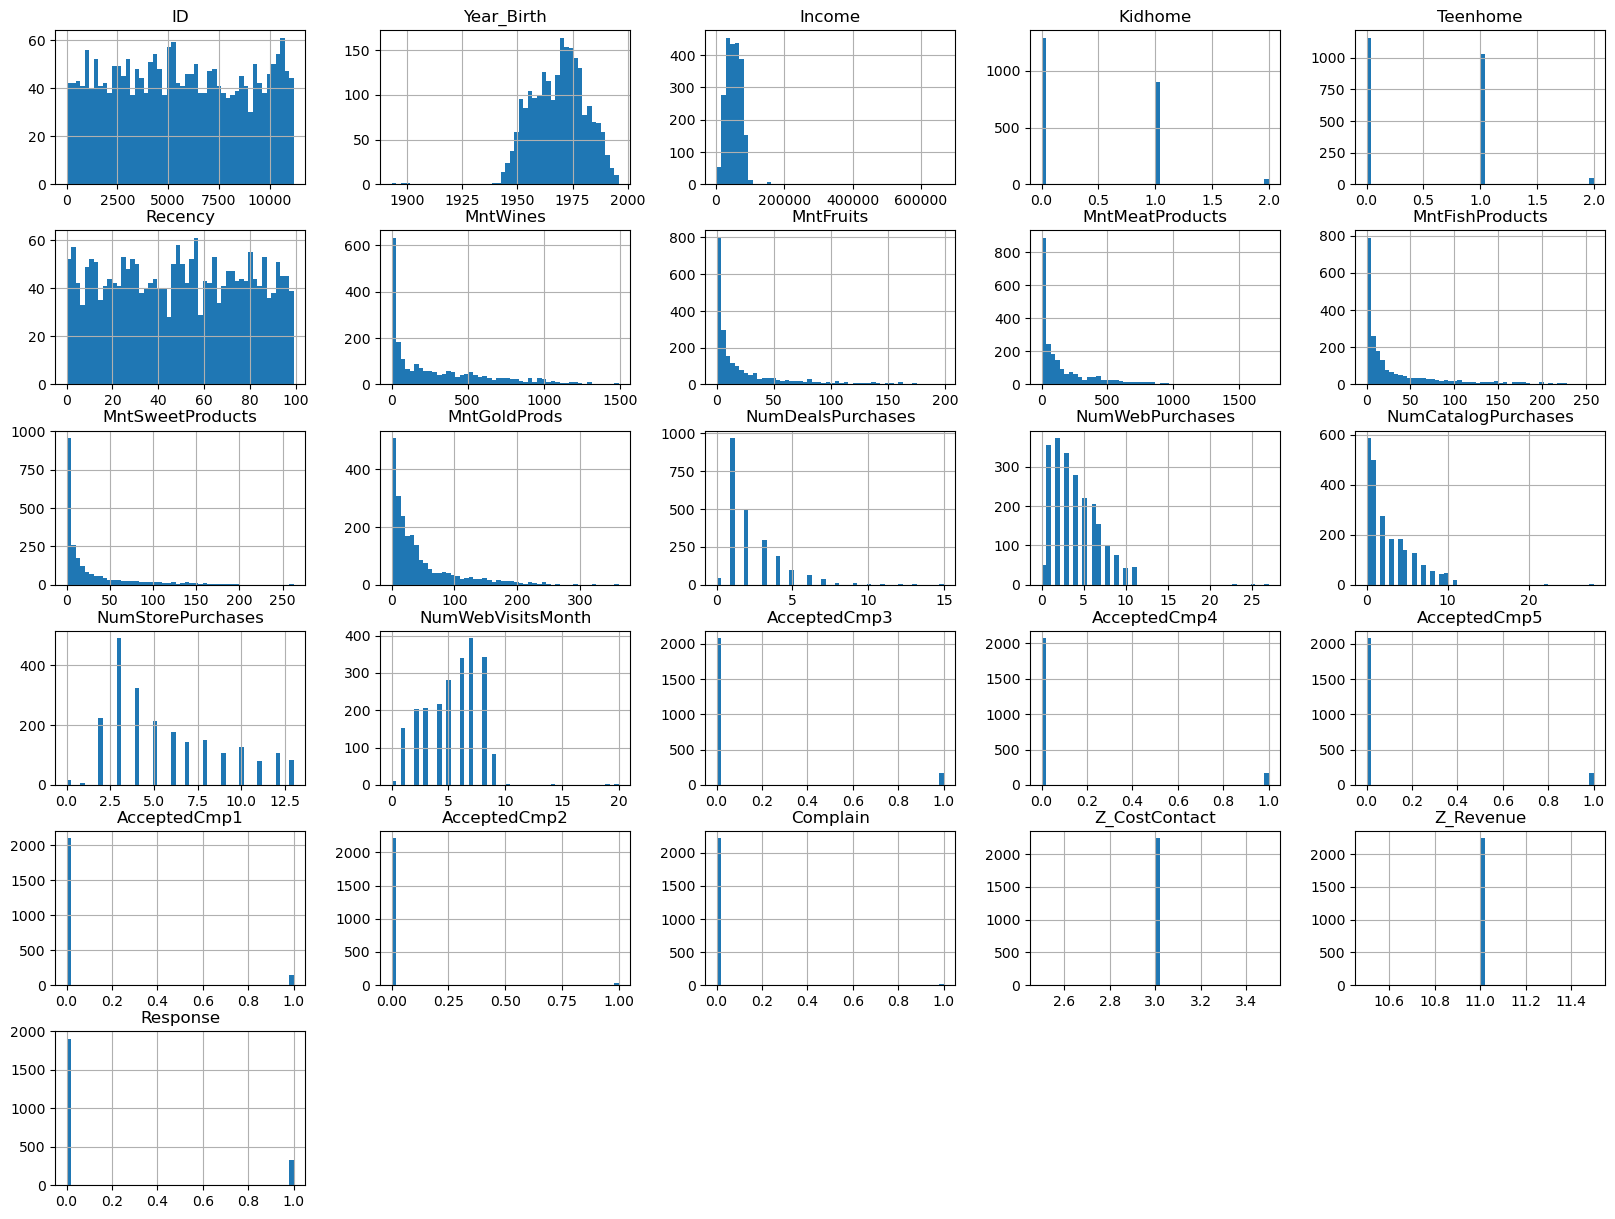

In [11]:
# look at the distributions
data.hist(bins=50, figsize=(20, 15))
plt.show()

### income may has an outliers ?

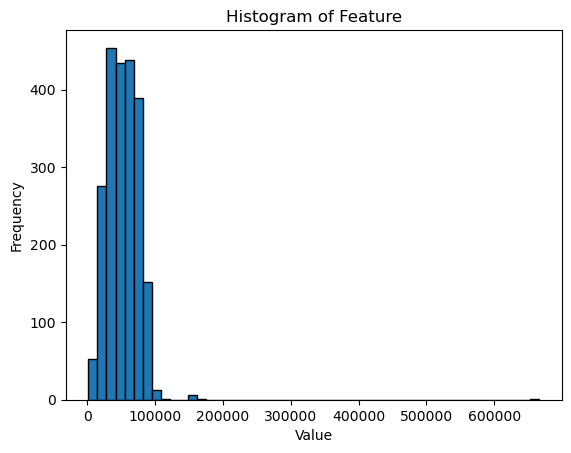

In [12]:
# income may has an outliers ?
plt.hist(data['Income'], bins=50, edgecolor='k')
plt.title('Histogram of Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Income'>

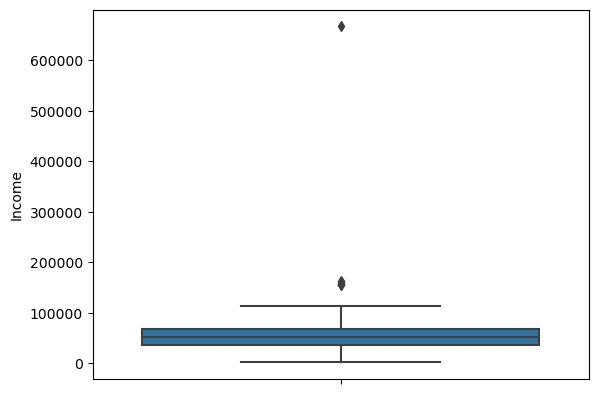

In [13]:
sns.boxplot(data,y='Income')

/home/tarek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


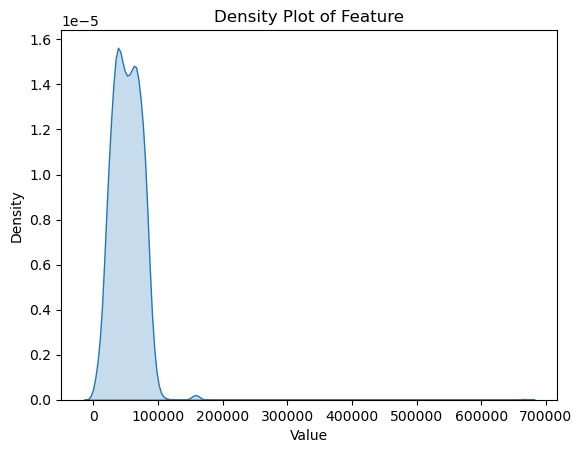

In [14]:
sns.kdeplot(data['Income'], fill=True)
plt.title('Density Plot of Feature')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


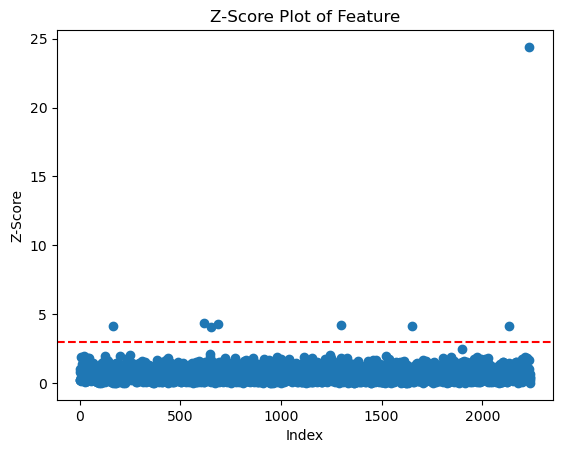

In [15]:
# Calculate z-scores
z_scores = np.abs((data['Income'] - data['Income'].mean()) / data['Income'].std())

plt.plot(z_scores, 'o')
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Z-Score Plot of Feature')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.show()

In [16]:
# the big numbers are real and important ?
data[z_scores > 3] 

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD       Together  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
164          1  01-03-2014       98        20          2             1582   
617          1  03-06-2013       31        85          1               16   
655          0  07-02-2014       81         1          1                1   
687          0  04-08-2012       21        55         16             1622   
1300         0  04-06-2013       37        39          1                9   
1653         0  29-04-2013       13         1          0             1725   
2132         0  29-08-2013       85         2          1                2   
2233         0  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
164                 1                 2             1                 15   
617                 2                 1             2                  0   
655                 1                 1             1                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
1653                2                 1             1                  0   
2132                1                 1             1                  0   
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
164                 0                   22                  0   
617                 0                    0                  1   
655                 0                    0                  0   
687                 0                   28                  1   
1300                1                    0                  1   
1653                0                   28                  0   
2132                0                    0                  0   
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
164                   0             0             0             0   
617                   1             0             0             0   
655                   0             0             0             0   
687                   0             0             0             0   
1300                  1             0             0             0   
1653                  1             0             0             0   
2132                  0             0             0             0   
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
164              0             0         0              3         11         0  
617              0             0         0              3         11         0  
655              0             0         0              3         11         0  
687              0             0         0              3         11         0  
1300             0             0         0              3         11         0  
1653             0             0         0              3         11         0  
2132             0             0         0              3         11         0  
2233             0             0         0              3         11         0

### outliers ( extreme values ) 

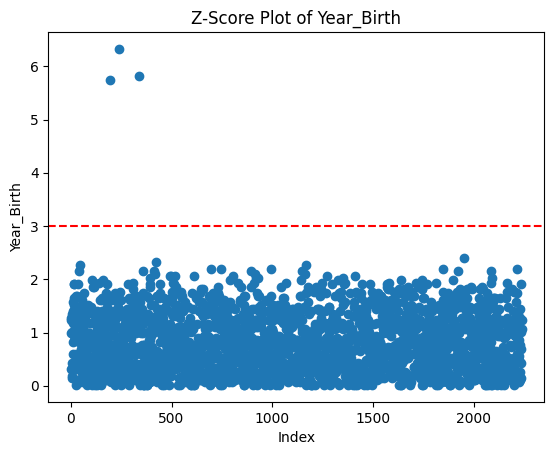

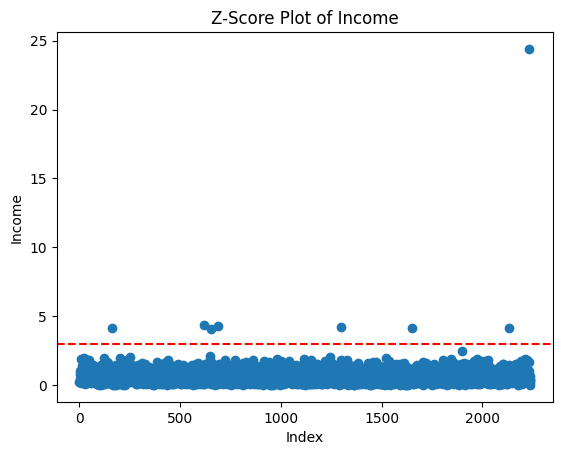

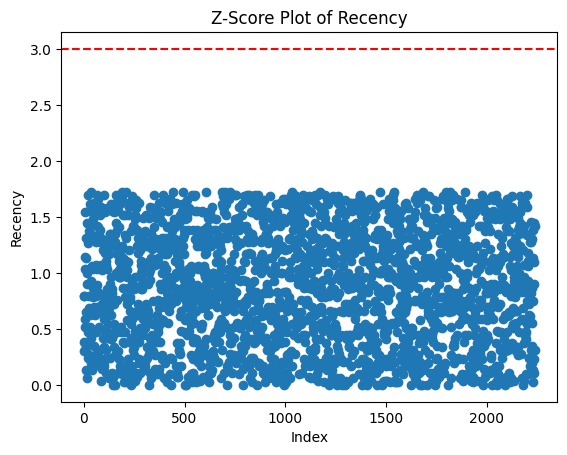

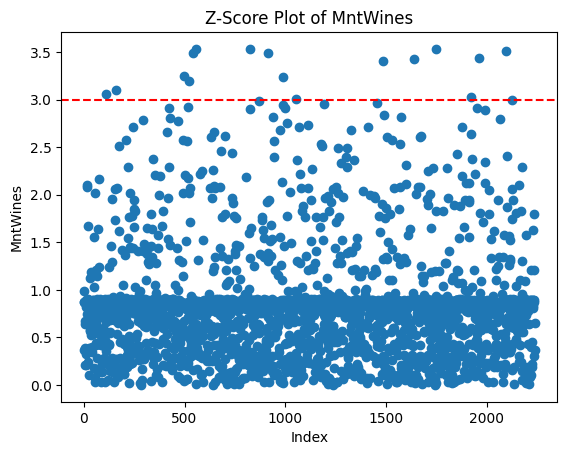

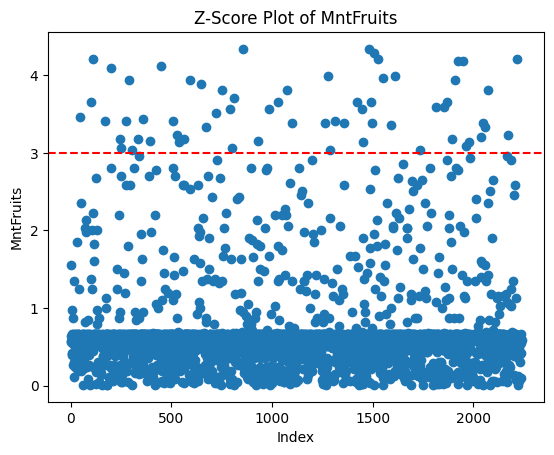

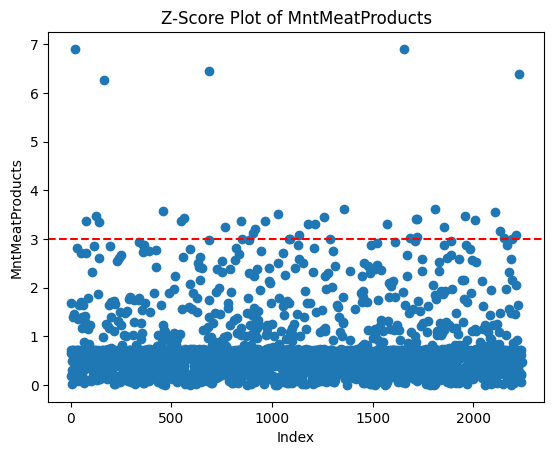

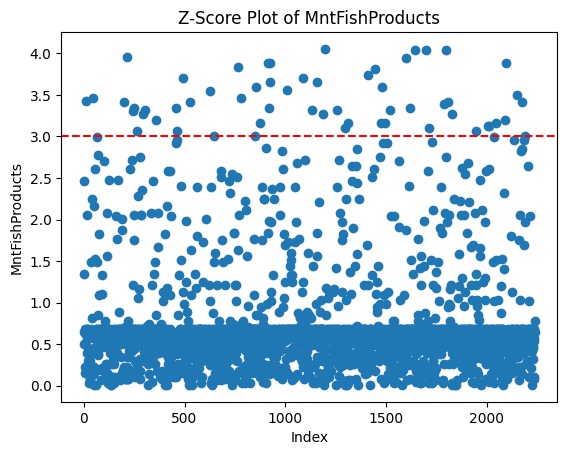

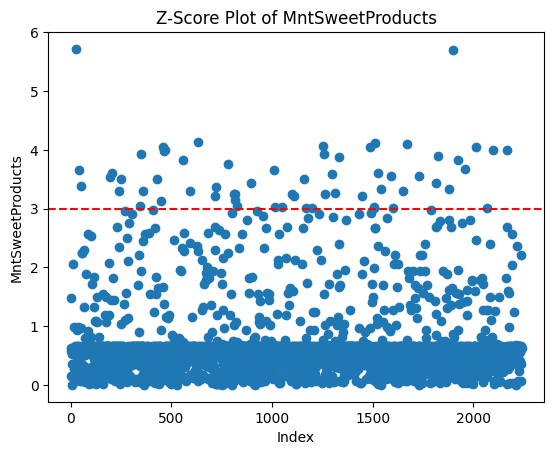

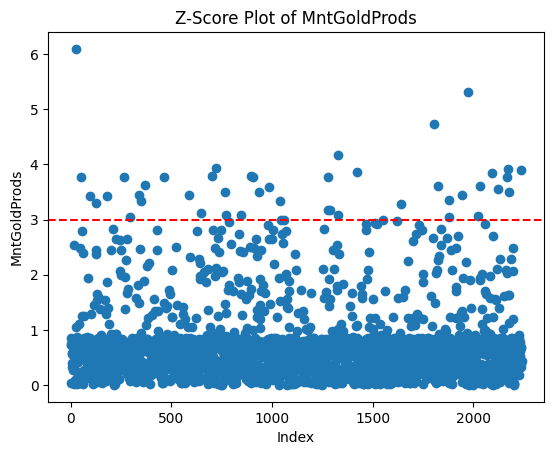

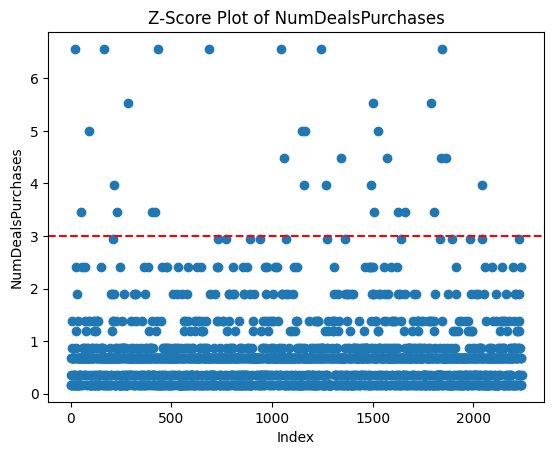

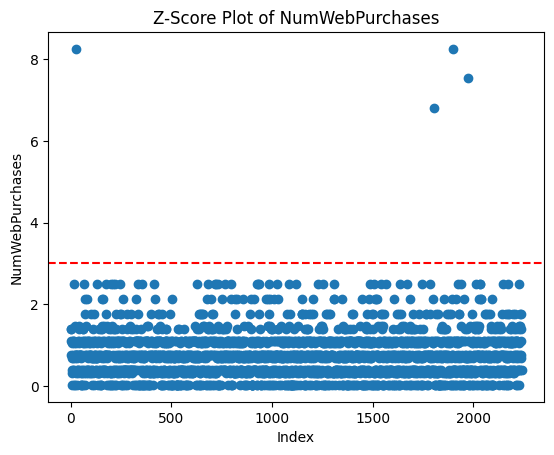

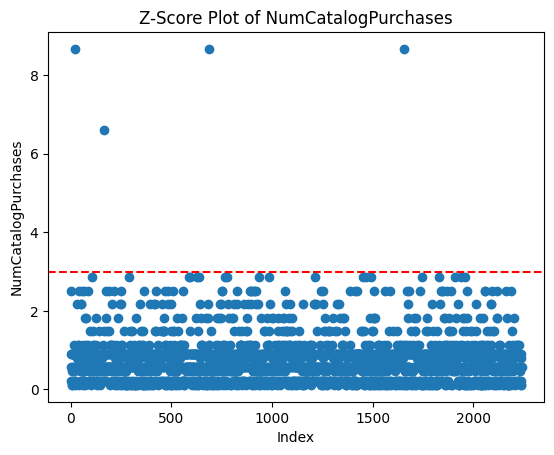

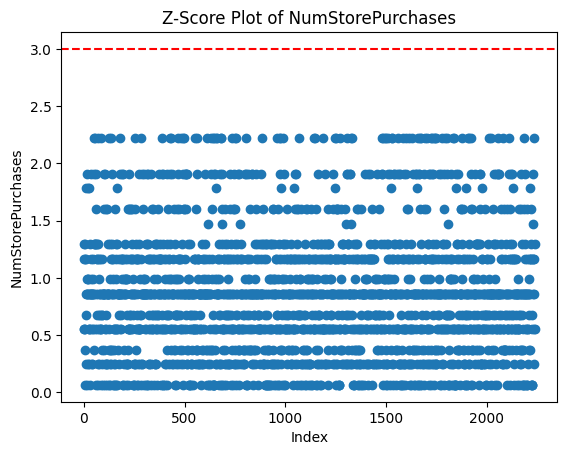

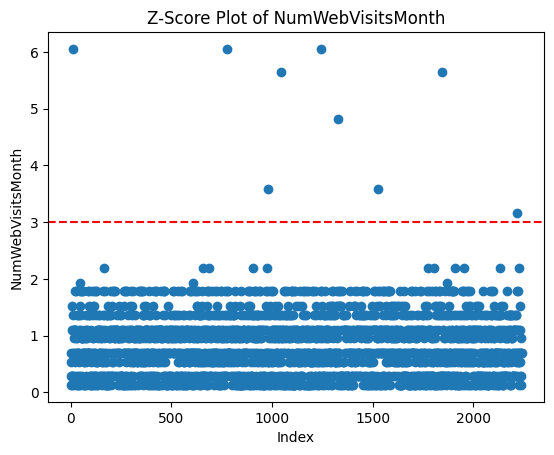

In [38]:
selected_columns = [feature for feature in data.select_dtypes(['float', 'int']).columns if data[feature].nunique() > 3] # to avoid numeric values that may be cat

for col in selected_columns:
    # Calculate z-scores
    z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())

    plt.plot(z_scores, 'o')
    plt.axhline(y=3, color='r', linestyle='--')
    plt.title(f'Z-Score Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()
        


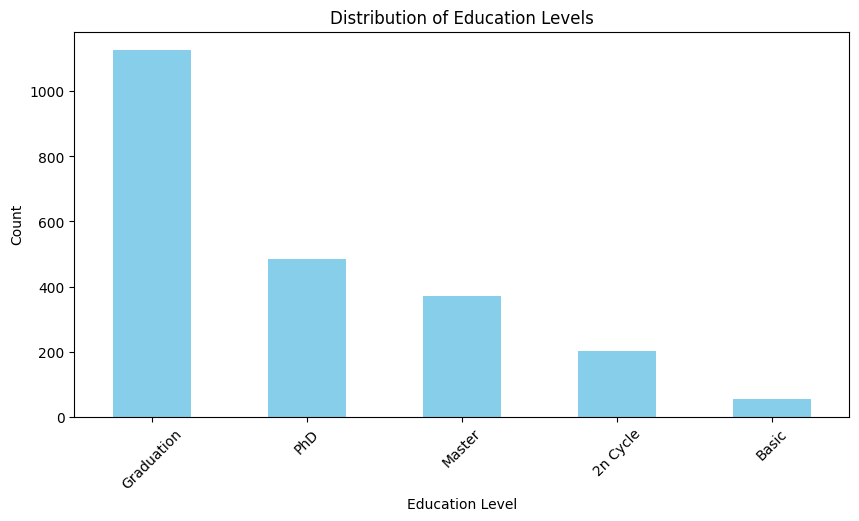

In [63]:
# categorical distributions..-> distinct non-numeric value.

# Plot Education
plt.figure(figsize=(10, 5))
data['Education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

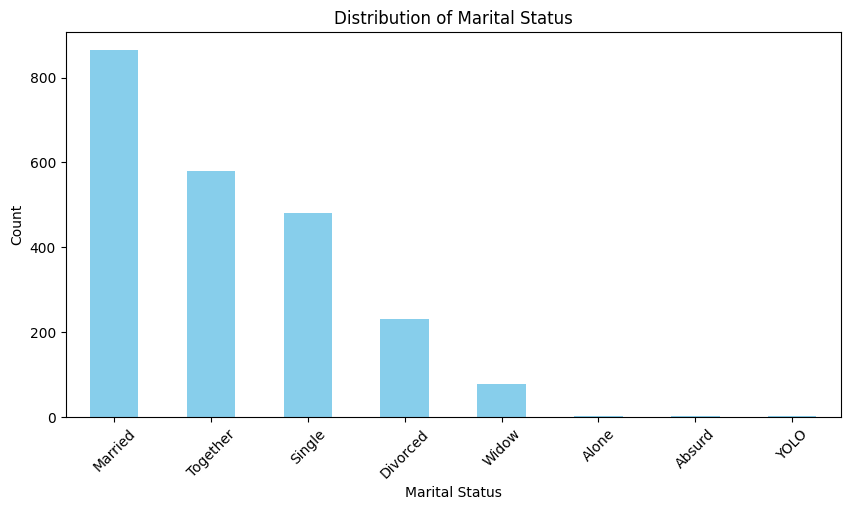

In [72]:
# Plot Marital Status
plt.figure(figsize=(10, 5))
data['Marital_Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Bivariate and more

- which are the important features?

In [17]:
# look at variance to detect important features to go deeply with.

from sklearn.preprocessing import StandardScaler

num_data = data.select_dtypes(['float', 'int']).drop(['ID'],axis = 1)

# Standardize the features
scaler = StandardScaler()
df_standardized = scaler.fit_transform(num_data) # to use the variance as a metric.

# Convert standardized data back to DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=num_data.columns)




In [18]:
# Calculate variances of standardized features
variances = df_standardized.var()

# Sort features by variance in descending order
sorted_variances = variances.sort_values(ascending=False)
print("Sorted Variances:\n", sorted_variances)


Sorted Variances:
 Income                 1.000451
AcceptedCmp2           1.000447
NumCatalogPurchases    1.000447
MntGoldProds           1.000447
MntSweetProducts       1.000447
NumWebPurchases        1.000447
NumWebVisitsMonth      1.000447
AcceptedCmp1           1.000447
NumStorePurchases      1.000447
AcceptedCmp5           1.000447
AcceptedCmp3           1.000447
MntFishProducts        1.000447
Kidhome                1.000447
Recency                1.000447
MntMeatProducts        1.000447
Response               1.000447
Year_Birth             1.000447
MntFruits              1.000447
MntWines               1.000447
NumDealsPurchases      1.000447
Complain               1.000447
AcceptedCmp4           1.000447
Teenhome               1.000447
Z_CostContact          0.000000
Z_Revenue              0.000000
dtype: float64


In [19]:
# Calculate cumulative variance
cumulative_variance = sorted_variances.cumsum()
print("Cumulative Variance:\n", cumulative_variance)


Cumulative Variance:
 Income                  1.000451
AcceptedCmp2            2.000898
NumCatalogPurchases     3.001345
MntGoldProds            4.001791
MntSweetProducts        5.002238
NumWebPurchases         6.002685
NumWebVisitsMonth       7.003131
AcceptedCmp1            8.003578
NumStorePurchases       9.004024
AcceptedCmp5           10.004471
AcceptedCmp3           11.004918
MntFishProducts        12.005364
Kidhome                13.005811
Recency                14.006258
MntMeatProducts        15.006704
Response               16.007151
Year_Birth             17.007598
MntFruits              18.008044
MntWines               19.008491
NumDealsPurchases      20.008937
Complain               21.009384
AcceptedCmp4           22.009831
Teenhome               23.010277
Z_CostContact          23.010277
Z_Revenue              23.010277
dtype: float64


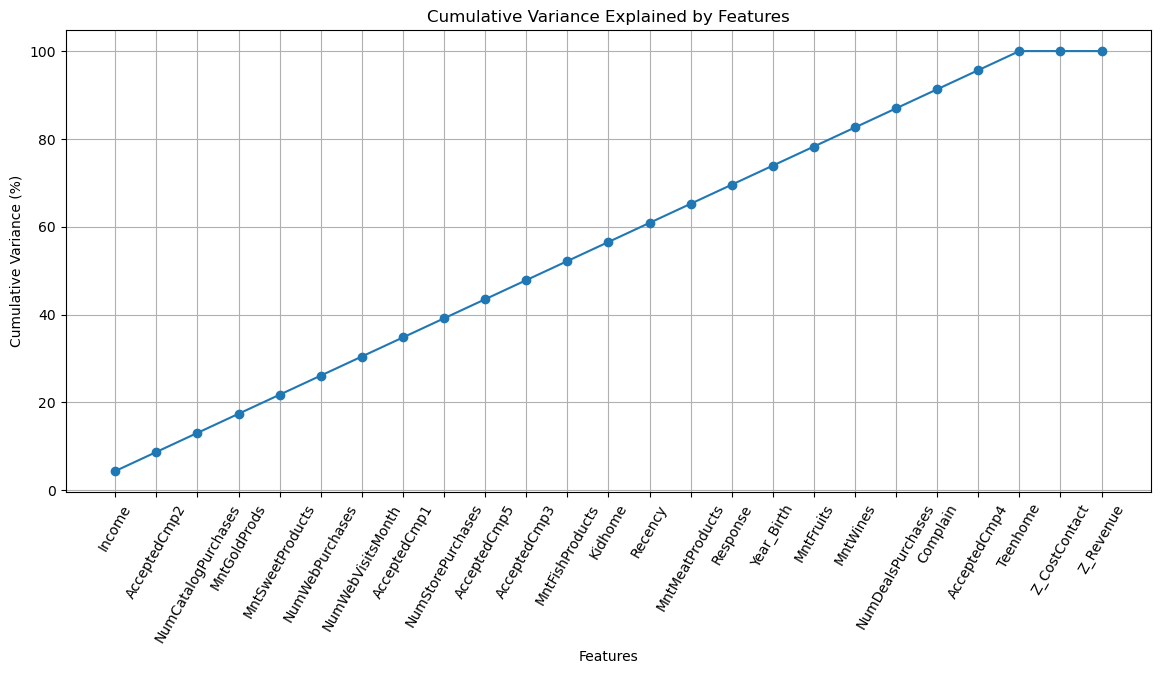

In [20]:
# Convert cumulative variance to percentage
cumulative_variance_percentage = cumulative_variance / cumulative_variance.iloc[-1] * 100

# Plot the cumulative variance
plt.figure(figsize=(14, 6))
plt.plot(cumulative_variance_percentage, marker='o')
plt.xticks(range(len(cumulative_variance_percentage)), cumulative_variance_percentage.index, rotation=60)
plt.xlabel('Features')
plt.ylabel('Cumulative Variance (%)')
plt.title('Cumulative Variance Explained by Features')
plt.grid(True)
plt.show()

- from variance perspective, almost feature may has an impact and info. 

### Income with products and Purchases.

In [21]:
# Income with products and Purchases.

# sum product
data['SumProduct'] = data['MntMeatProducts'] +  data['MntFishProducts'] + data['MntSweetProducts'] + data['MntFruits'] + data['MntGoldProds']

# sum purchases
data['SumPurchases'] = (data['NumDealsPurchases'] + 
                       data['NumWebPurchases'] + 
                       data['NumCatalogPurchases'] + 
                       data['NumStorePurchases'])


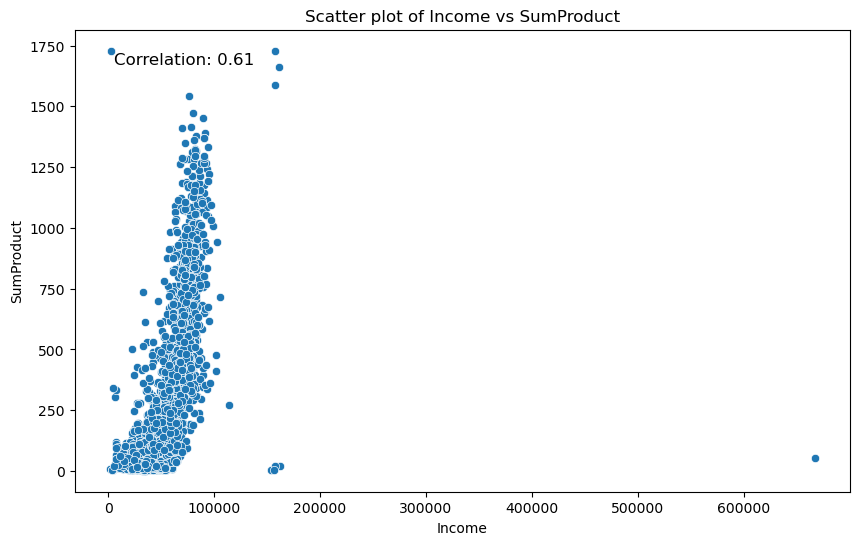

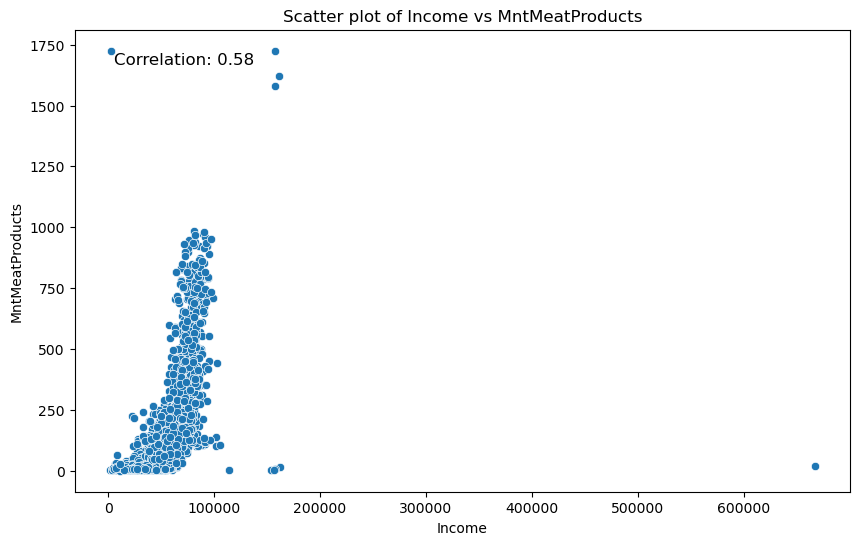

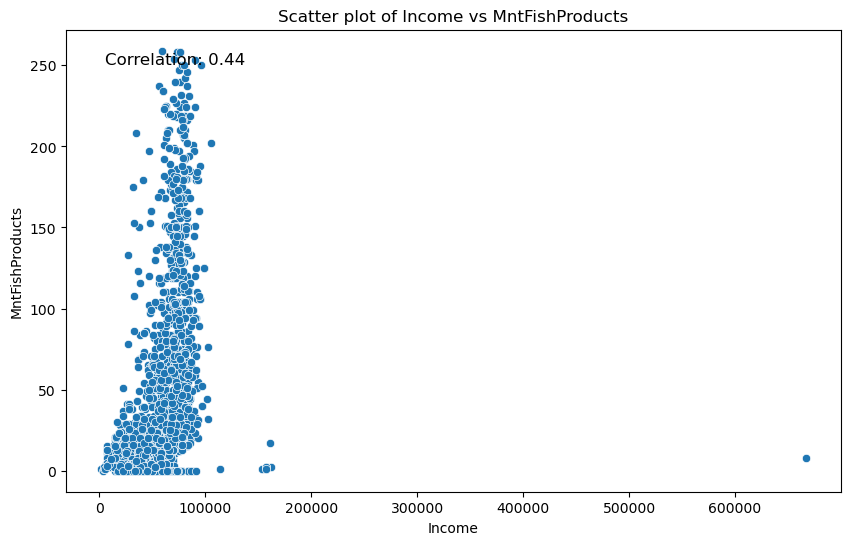

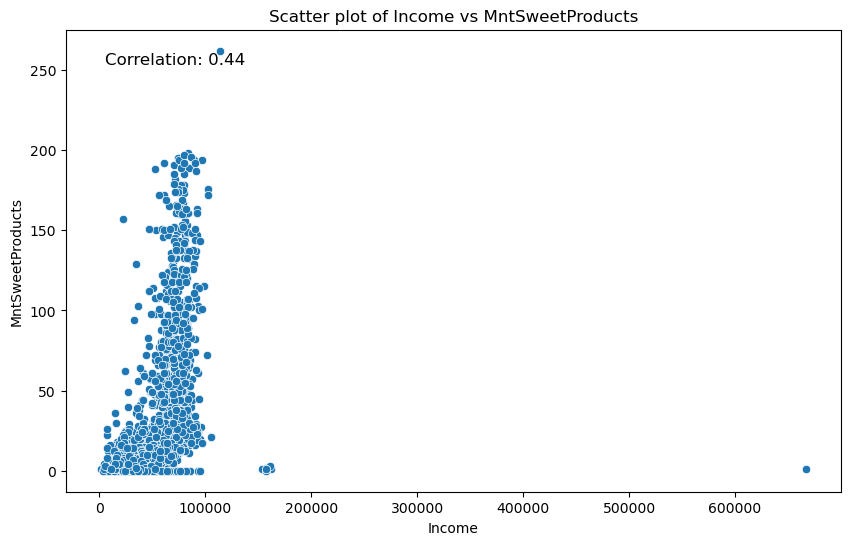

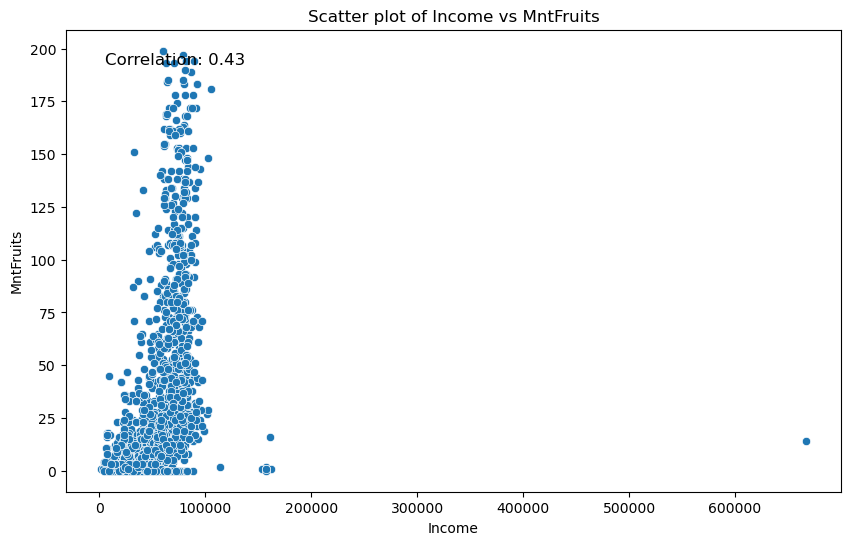

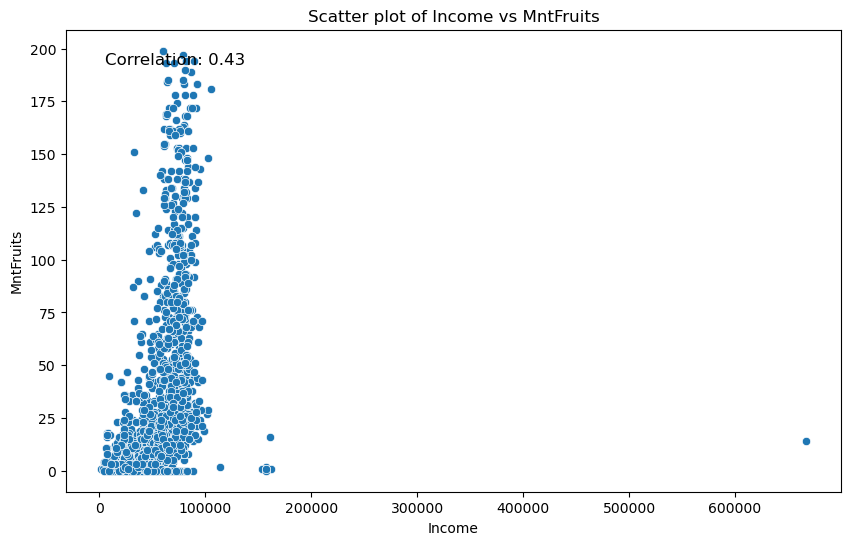

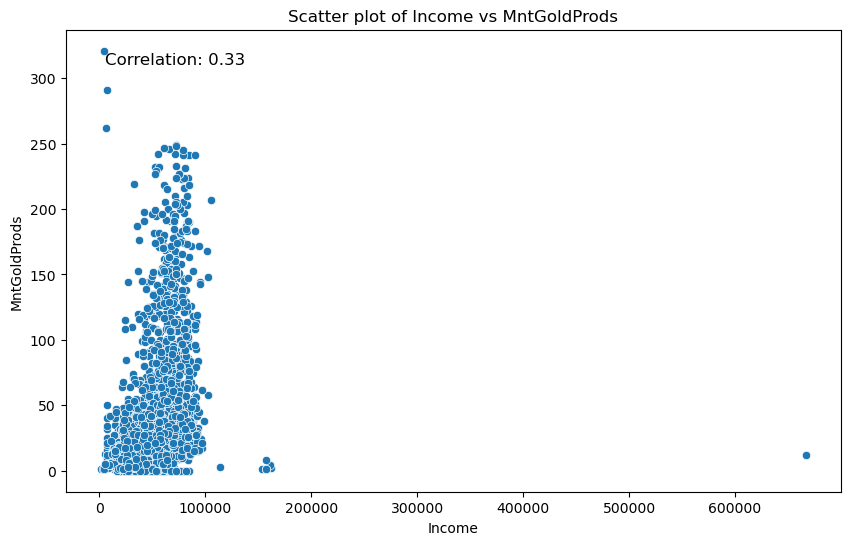

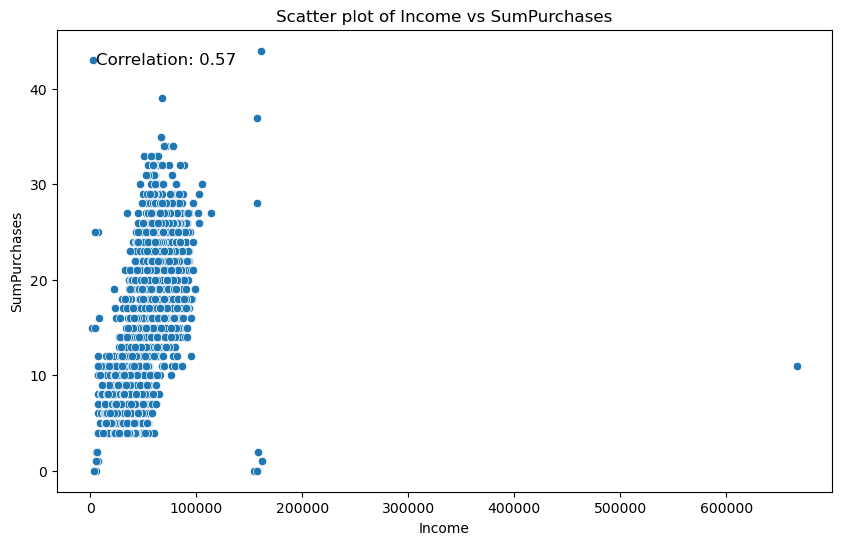

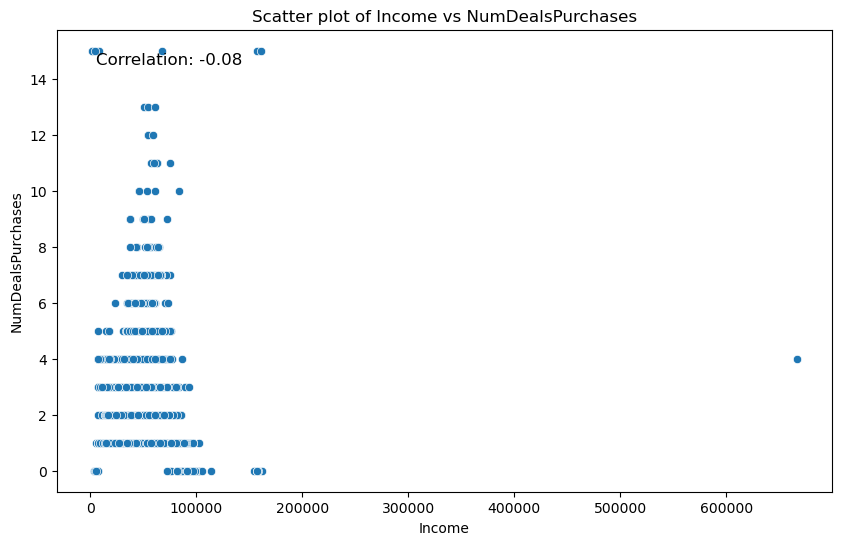

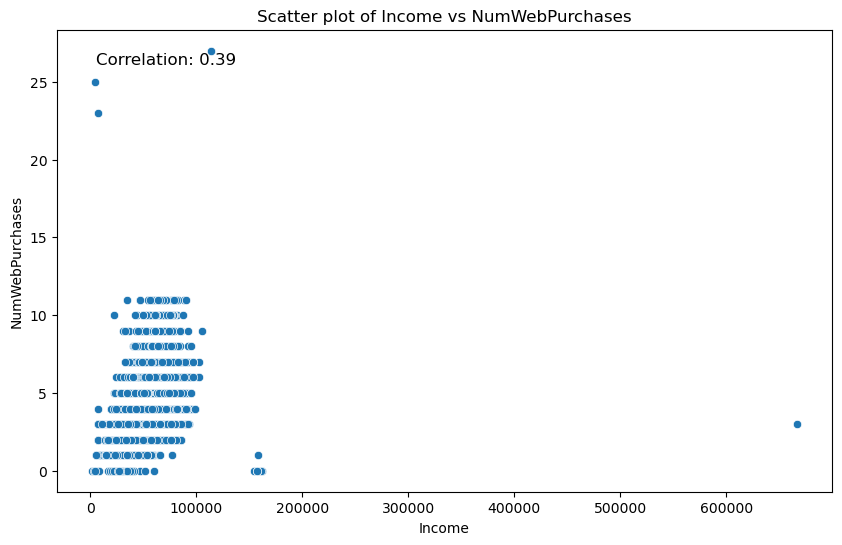

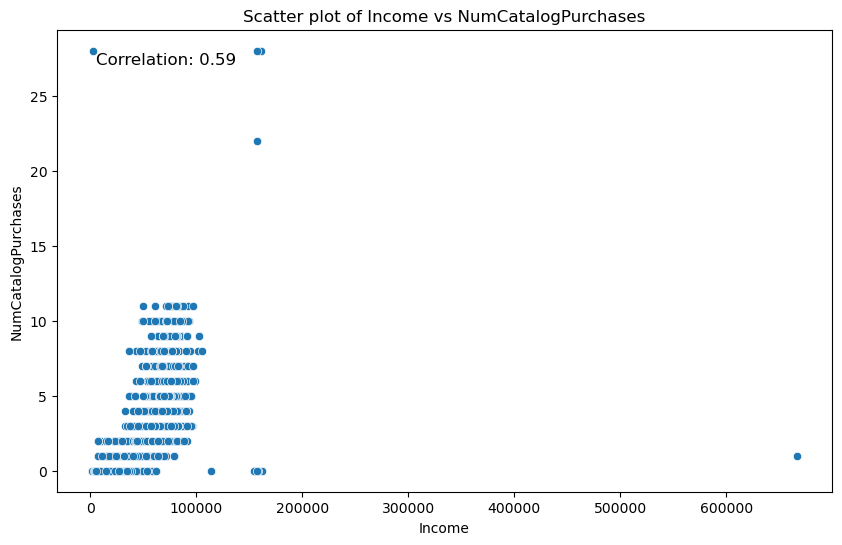

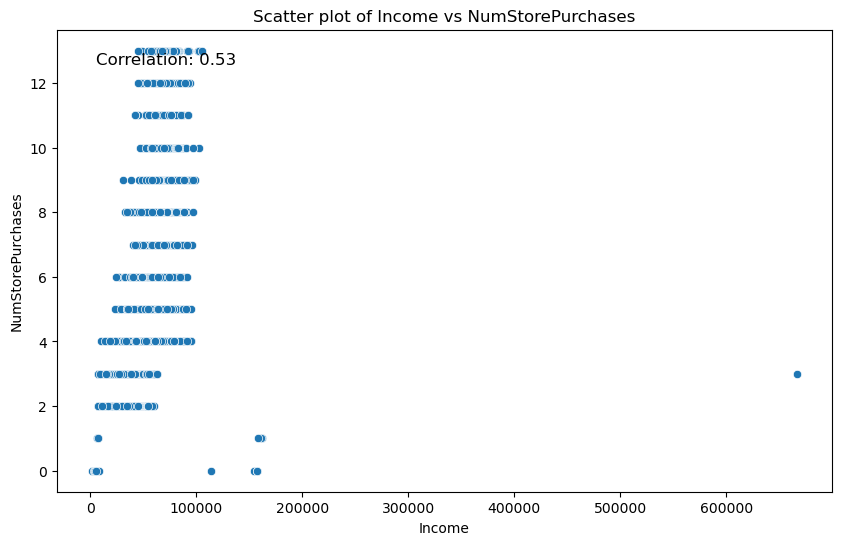

In [22]:

ProductColumns = ['SumProduct','MntMeatProducts','MntFishProducts','MntSweetProducts','MntFruits','MntFruits','MntGoldProds']
PurchasesColumns = ['SumPurchases','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
ProductAndPurchases = [ProductColumns,PurchasesColumns]
income = "Income"


def scatter_correlation(data,col1,col2):
                # Calculate correlation
                correlation = data[col1].corr(data[col2])

                # Create the scatter plot
                plt.figure(figsize=(10, 6))
                sns.scatterplot(data=data, x=col1, y=col2)

                # Annotate the correlation coefficient
                plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
                        transform=plt.gca().transAxes, 
                        fontsize=12, verticalalignment='top')

                plt.title(f'Scatter plot of {col1} vs {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.show()


for columns in ProductAndPurchases:
        for column in columns:
                scatter_correlation(data,income,column)
                

        

### Product with Purchases is strong positive correlation?  

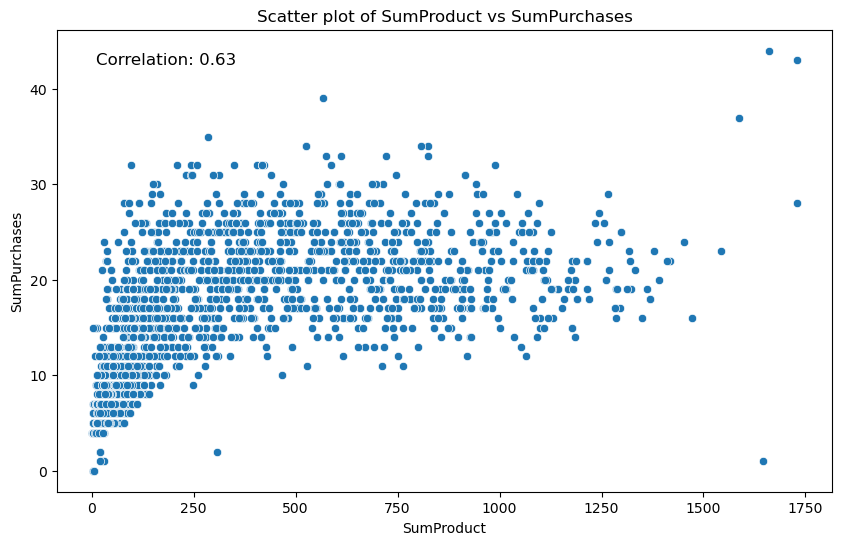

In [23]:
# sum products and sum purchases
scatter_correlation(data,"SumProduct","SumPurchases")

### campaign

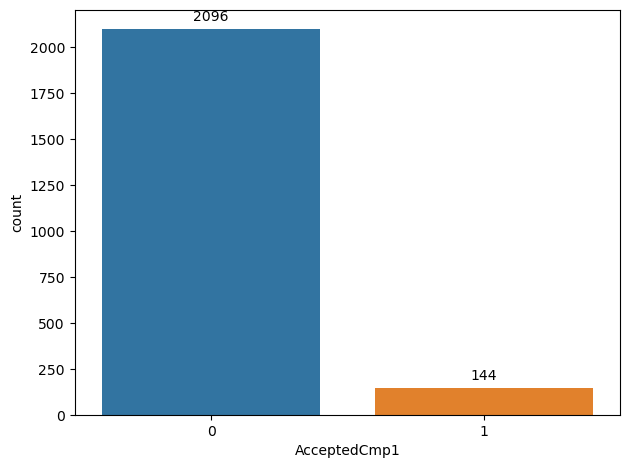

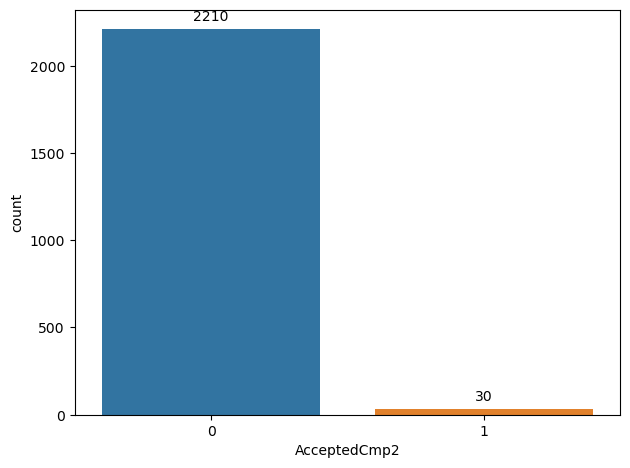

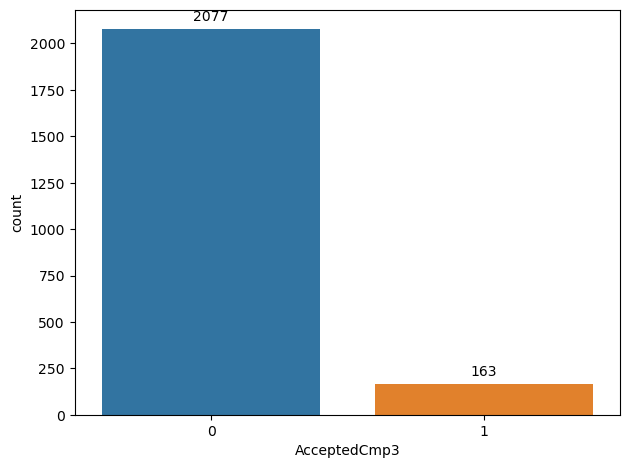

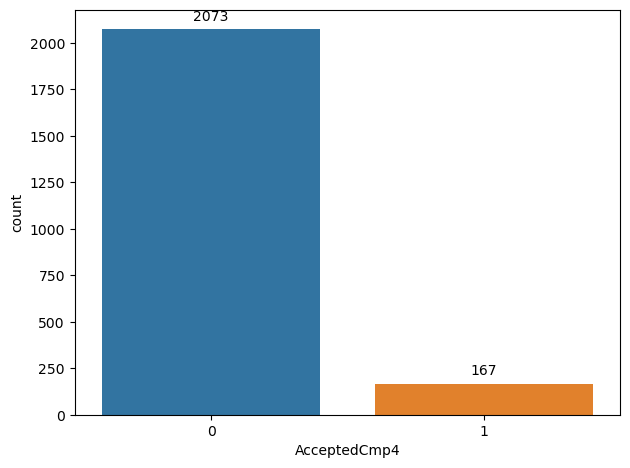

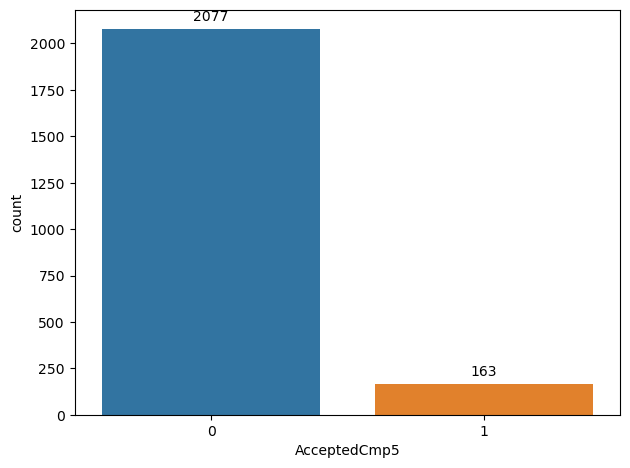

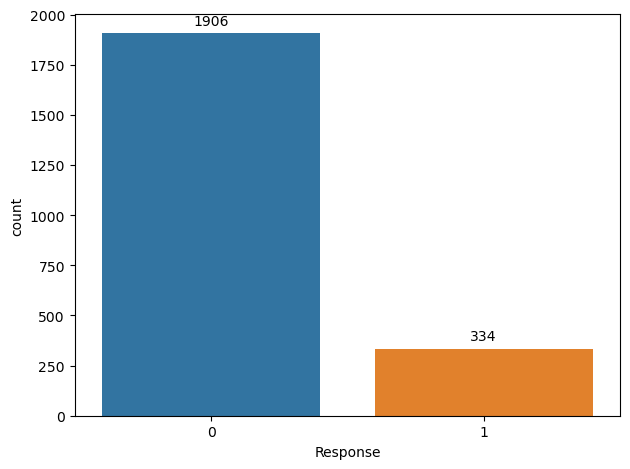

In [24]:
# look at campaign
campaigns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']


# how many people participate in every campaign
for cam in campaigns:
    ax = sns.countplot(data,x = cam)
    
    # Add the count above the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
    
    plt.tight_layout()
    plt.show()
    


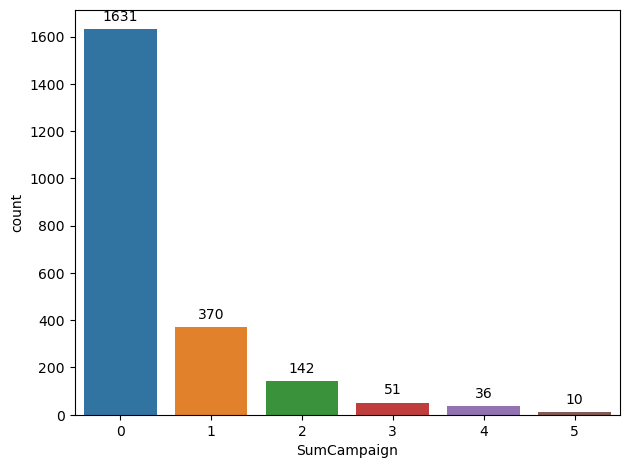

In [25]:
# how many people participate in more than campaign
data['SumCampaign'] =  (data['AcceptedCmp1'] + 
                       data['AcceptedCmp2'] + 
                       data['AcceptedCmp3'] + 
                       data['AcceptedCmp4'] + 
                       data['AcceptedCmp5'] + 
                       data['Response']) # respons is the last campaign




#camCount =  pd.DataFrame(data.groupby('SumCampaign').count()['ID'].reset_index())
#camCount.columns = ['SumCampaign','count']
#sns.histplot(camCount,x="count")

ax = sns.countplot(data,x="SumCampaign")
    # Add the count above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
    
plt.tight_layout()
plt.show()


- most customers not participate in any campaign

### overall correlation.

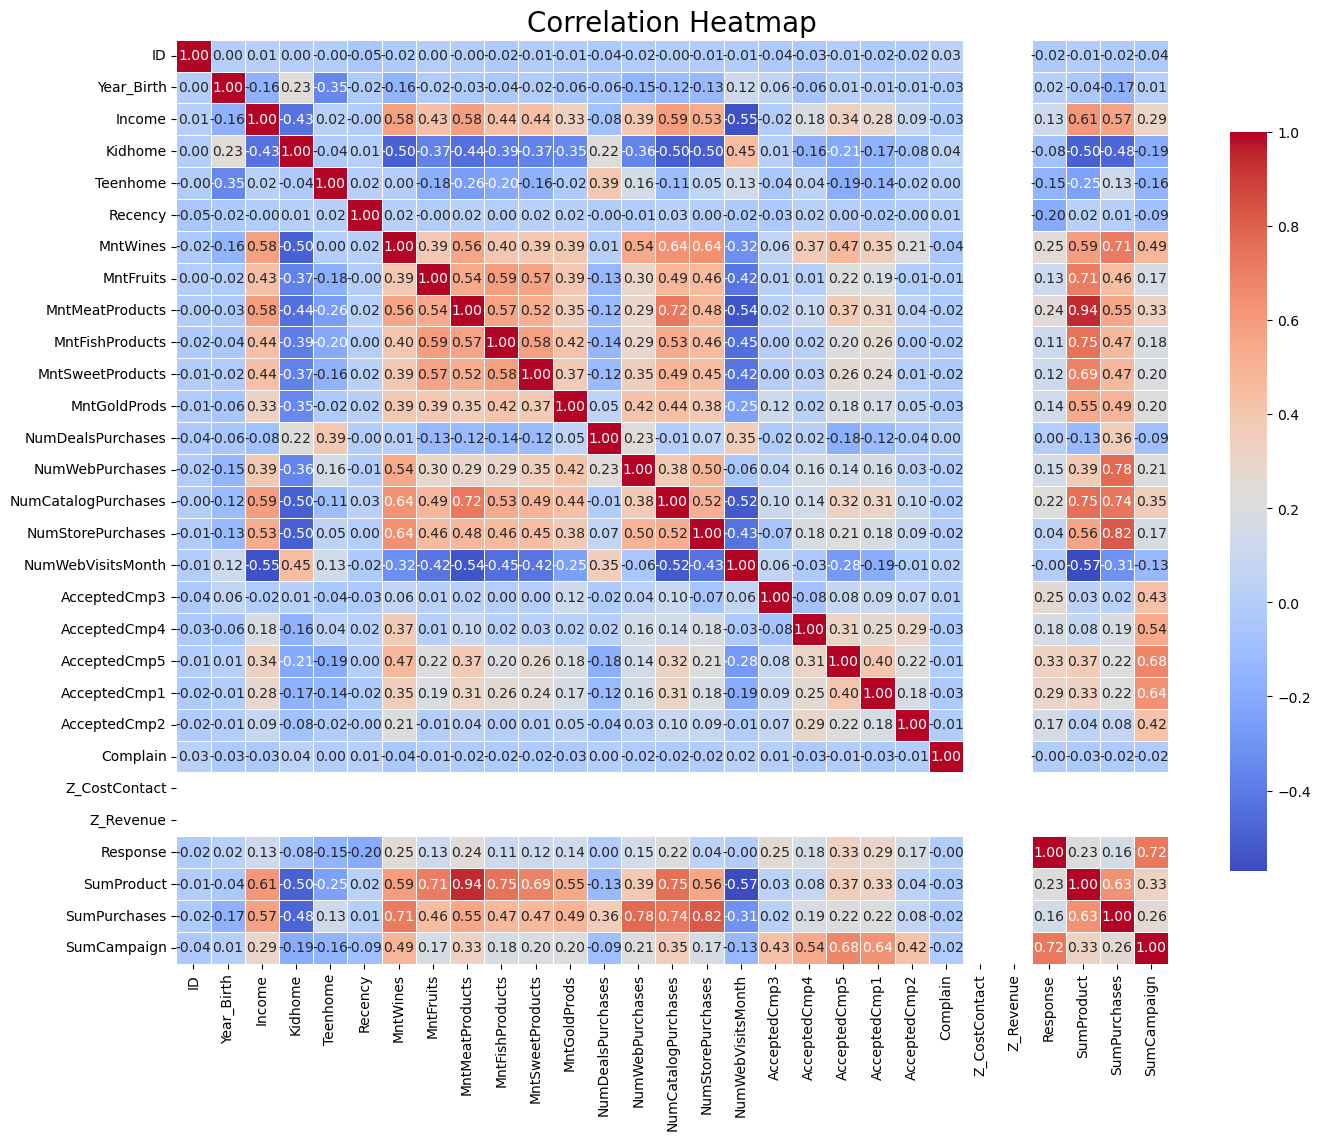

In [26]:
# a look at correlation 
# Set the figure size for a bigger image
plt.figure(figsize=(16, 12))

# Create the heatmap with annotations and a coolwarm colormap
sns.heatmap(data.select_dtypes(['float', 'int']).corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',  # Format the annotations to 2 decimal places
            linewidths=0.5,  # Add lines between cells for better readability
            cbar_kws={'shrink': 0.8})  # Shrink the color bar to fit better

# Add a title for context
plt.title('Correlation Heatmap', fontsize=20)

# Display the heatmap
plt.show()

In [27]:
print(f"Z_Revenue nunique = {data.Z_Revenue.nunique()}")
print(f"Z_CostContact nunique = {data.Z_CostContact.nunique()}")

Z_Revenue nunique = 1
Z_CostContact nunique = 1


## Distributions

### Normal ?

In [41]:
# first drop null points
null_out_data = data.dropna() 
null_out_data.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Shapiro-Wilk Test Statistic: 0.9755173325538635
p-value: 0.00000000000000000048
 Year_Birth is Not normal


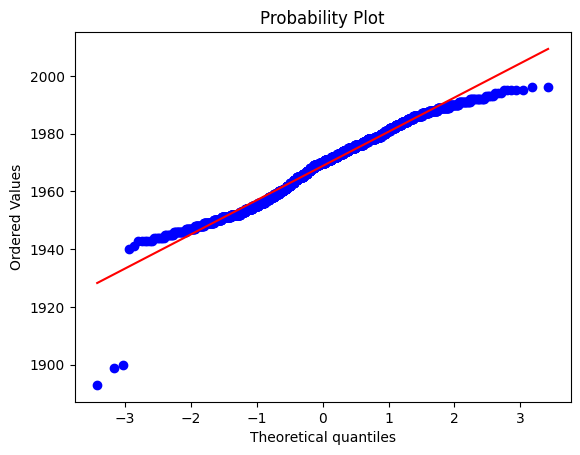

Shapiro-Wilk Test Statistic: 0.7770531177520752
p-value: 0.00000000000000000000
 Income is Not normal


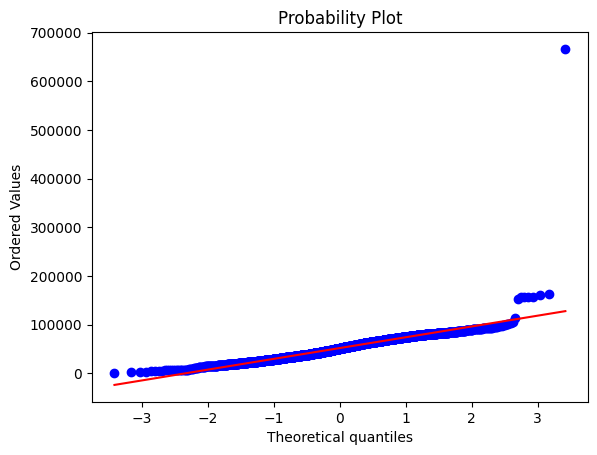

Shapiro-Wilk Test Statistic: 0.954283595085144
p-value: 0.00000000000000000000
 Recency is Not normal


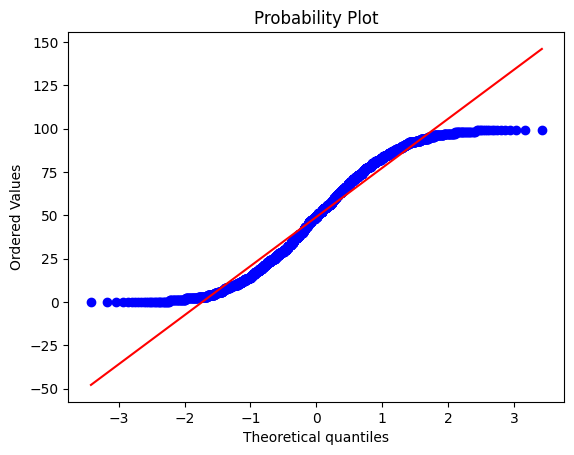

Shapiro-Wilk Test Statistic: 0.8388119339942932
p-value: 0.00000000000000000000
 MntWines is Not normal


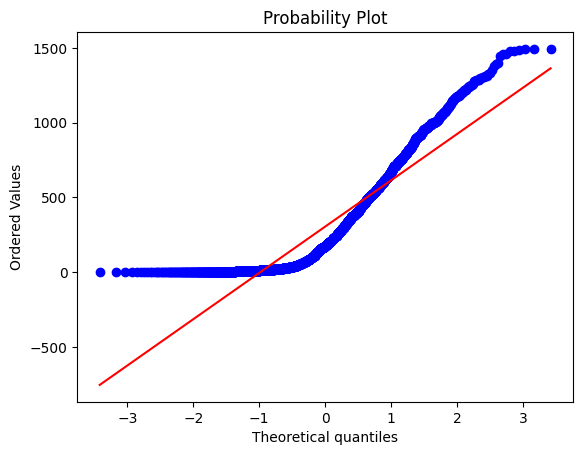

Shapiro-Wilk Test Statistic: 0.6896465420722961
p-value: 0.00000000000000000000
 MntFruits is Not normal


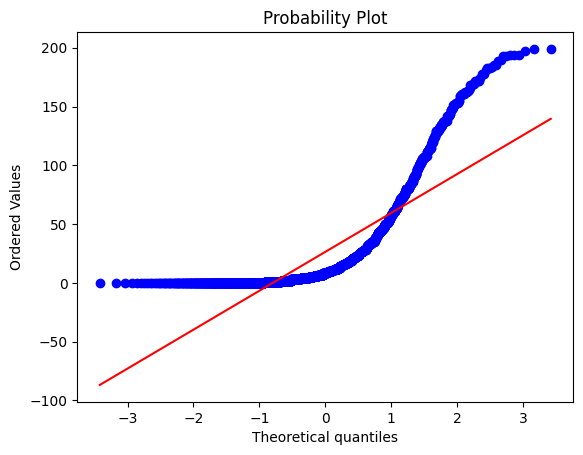

Shapiro-Wilk Test Statistic: 0.7337419986724854
p-value: 0.00000000000000000000
 MntMeatProducts is Not normal


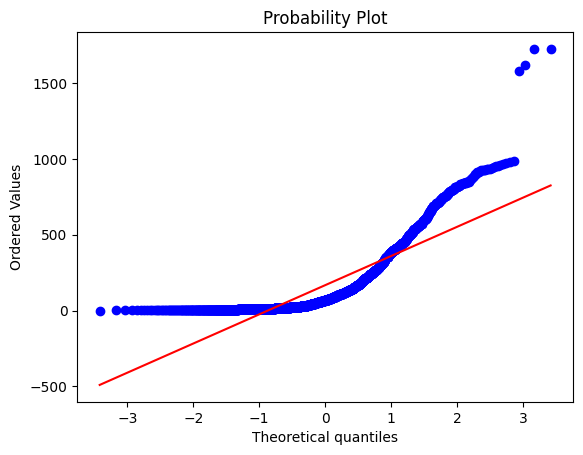

Shapiro-Wilk Test Statistic: 0.7088431119918823
p-value: 0.00000000000000000000
 MntFishProducts is Not normal


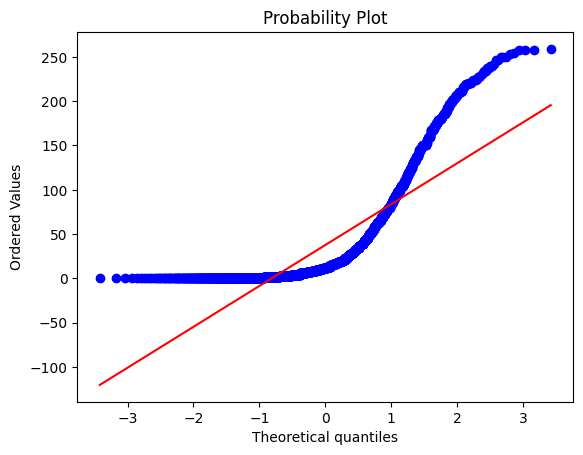

Shapiro-Wilk Test Statistic: 0.6883111596107483
p-value: 0.00000000000000000000
 MntSweetProducts is Not normal


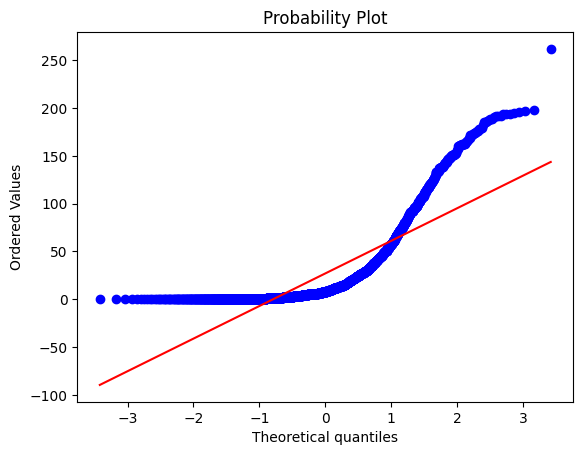

Shapiro-Wilk Test Statistic: 0.7695824503898621
p-value: 0.00000000000000000000
 MntGoldProds is Not normal


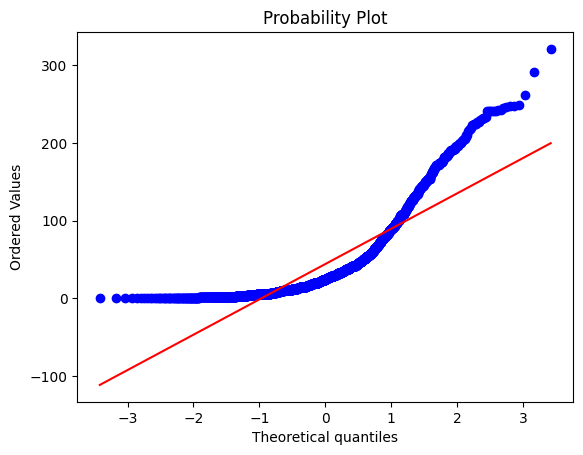

Shapiro-Wilk Test Statistic: 0.7403451204299927
p-value: 0.00000000000000000000
 NumDealsPurchases is Not normal


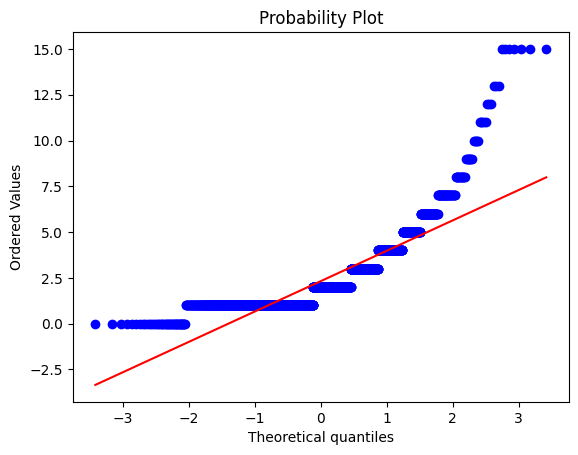

Shapiro-Wilk Test Statistic: 0.9085198640823364
p-value: 0.00000000000000000000
 NumWebPurchases is Not normal


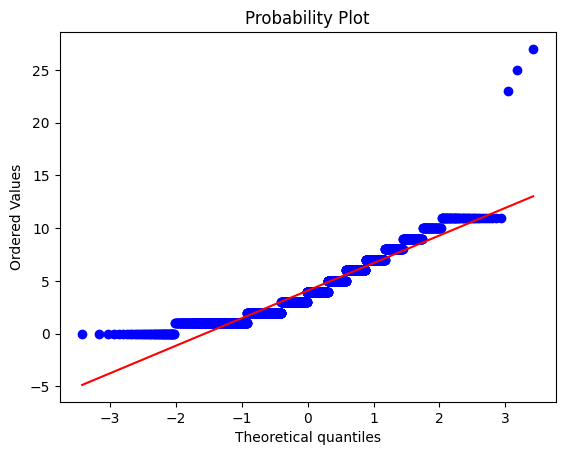

Shapiro-Wilk Test Statistic: 0.8153939247131348
p-value: 0.00000000000000000000
 NumCatalogPurchases is Not normal


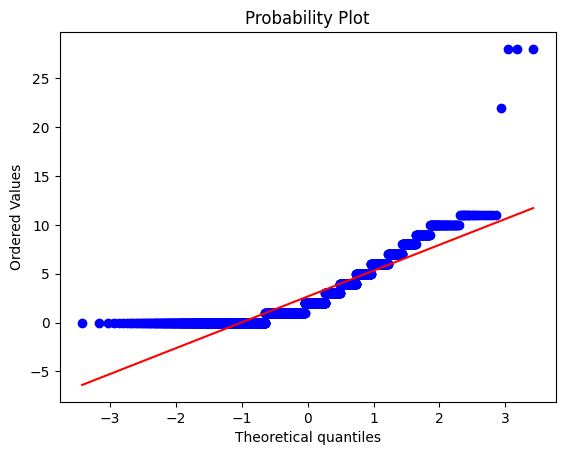

Shapiro-Wilk Test Statistic: 0.9040797352790833
p-value: 0.00000000000000000000
 NumStorePurchases is Not normal


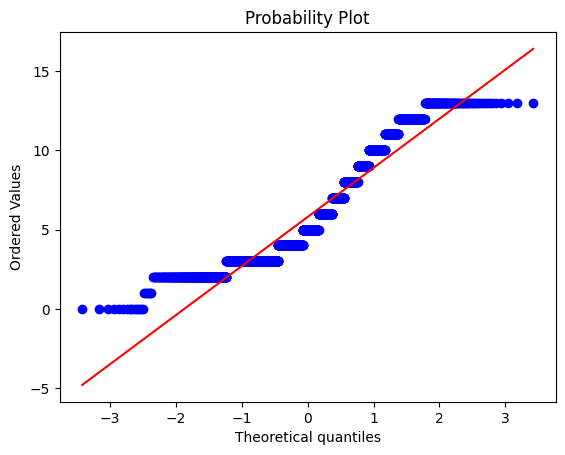

Shapiro-Wilk Test Statistic: 0.9297239780426025
p-value: 0.00000000000000000000
 NumWebVisitsMonth is Not normal


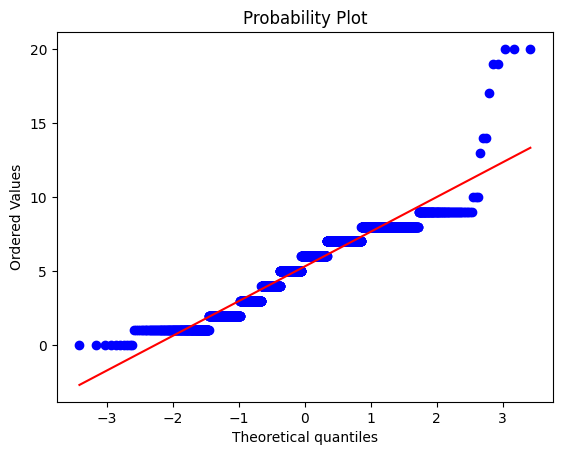

In [18]:
# # Shapiro-Wilk Test
for feature_name in selected_columns:
    feature = null_out_data[feature_name]
    
    # Shapiro-Wilk Test
    stat, p_value = stats.shapiro(feature)
    print('Shapiro-Wilk Test Statistic:', stat)
    print('p-value:', format(p_value,'.20f'))

    if p_value >= 0.05:
        print(f" {feature_name} is Normal")
    else:
        print(f" {feature_name} is Not normal")

    # Q-Q Plot
    stats.probplot(feature, dist="norm", plot=plt)
    plt.show()


### Not normal, is or near to what ?

In [23]:
distributions = [
    'norm', 'expon', 'lognorm', 'gamma', 'beta', 'weibull_min', 'weibull_max', 
    'cauchy', 'chi2', 'f', 't', 'laplace', 'logistic', 'uniform', 'pareto', 
    'powerlaw', 'rayleigh', 'gumbel_r', 'gumbel_l', 'sech', 'invgauss', 'triang'
] # may use this list instead of testing 80 ( fitter will test all scipy distrbutions, they are 80 distribution )

2024-08-02 07:23:42.822 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.01984)
2024-08-02 07:23:42.889 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.001439)
2024-08-02 07:23:42.959 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.00146)


{'gamma': {'a': 337.6801297011091, 'loc': 1744.003633481384, 'scale': 0.6657825737749508}}
     index  sumsquare_error
0    gamma         0.001439
1  lognorm         0.001460


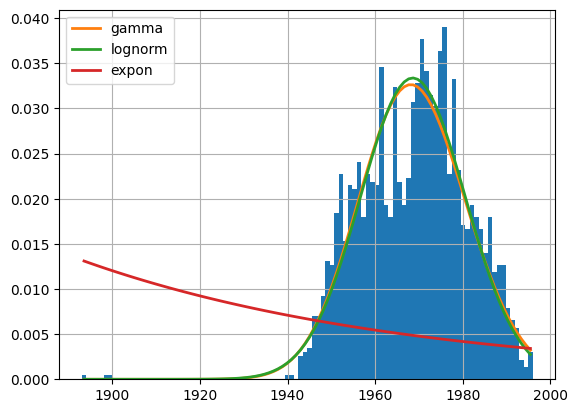

In [71]:
from collections import defaultdict

repeated_dist_con = defaultdict(int) # store the best repeated and the very near of it.
best_with_parameters_con = {}

for feature_name in selected_columns:
    f = Fitter(null_out_data[feature_name], distributions=[ 'expon', 'lognorm', 'gamma'] ) # will test 80 distributions 
    f.fit()
    
    # take the best with parameters
    best_with_parameters_con[feature_name] = f.get_best(method='sumsquare_error')

    # work with the top
    df_top = f.summary().iloc[:,0].reset_index() # take first column with the name of distributions
    
    lowest_error = df_top['sumsquare_error'][0]
    
    # select only near error from the lowest ---> this method is relative to the lowest --> lowest may be very big that's mean the feature not fit in any distribution from the list
    consider_error = lowest_error * 1.2 
    considerable_dist_df = df_top[df_top['sumsquare_error'] <= consider_error]
    print(considerable_dist_df)
    
    for dist in considerable_dist_df['index'].values:
        repeated_dist_con[dist] += 1
    
    plt.show()
    break
    

In [ ]:
best_with_parameters_con

In [29]:
repeated_dist_con

defaultdict(int,
            {'weibull_max': 1,
             'beta': 8,
             'weibull_min': 8,
             'norm': 6,
             'gamma': 11})

### what about discrete distributions ?

Fitter library did not work with me in discrete distributions, when i check all distributions of it, all of them are countinus!, in the Fitter doc that Fitter work in both!

In [75]:
# get discrete columns

cat_columns = [feature for feature in data.select_dtypes(['int']).columns if data[feature].nunique() < 4]
cat_columns

['Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [142]:
# to test on
cat_dist = ['poisson', 'geom', 'nbinom', 'hypergeom', 'multinomial']


In [154]:
cat_columns

['Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0.000654] [n=1] [p=0.408756] [chi^2=0.000654]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Create pdf plot for the discrete method.
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0.000795] [n=1] [p=0.470208] [chi^2=0.000795]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Create pdf plot for the discrete method.
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0] [n=1] [p=0.073556] [chi^2=nan]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Create pdf plot for the discre

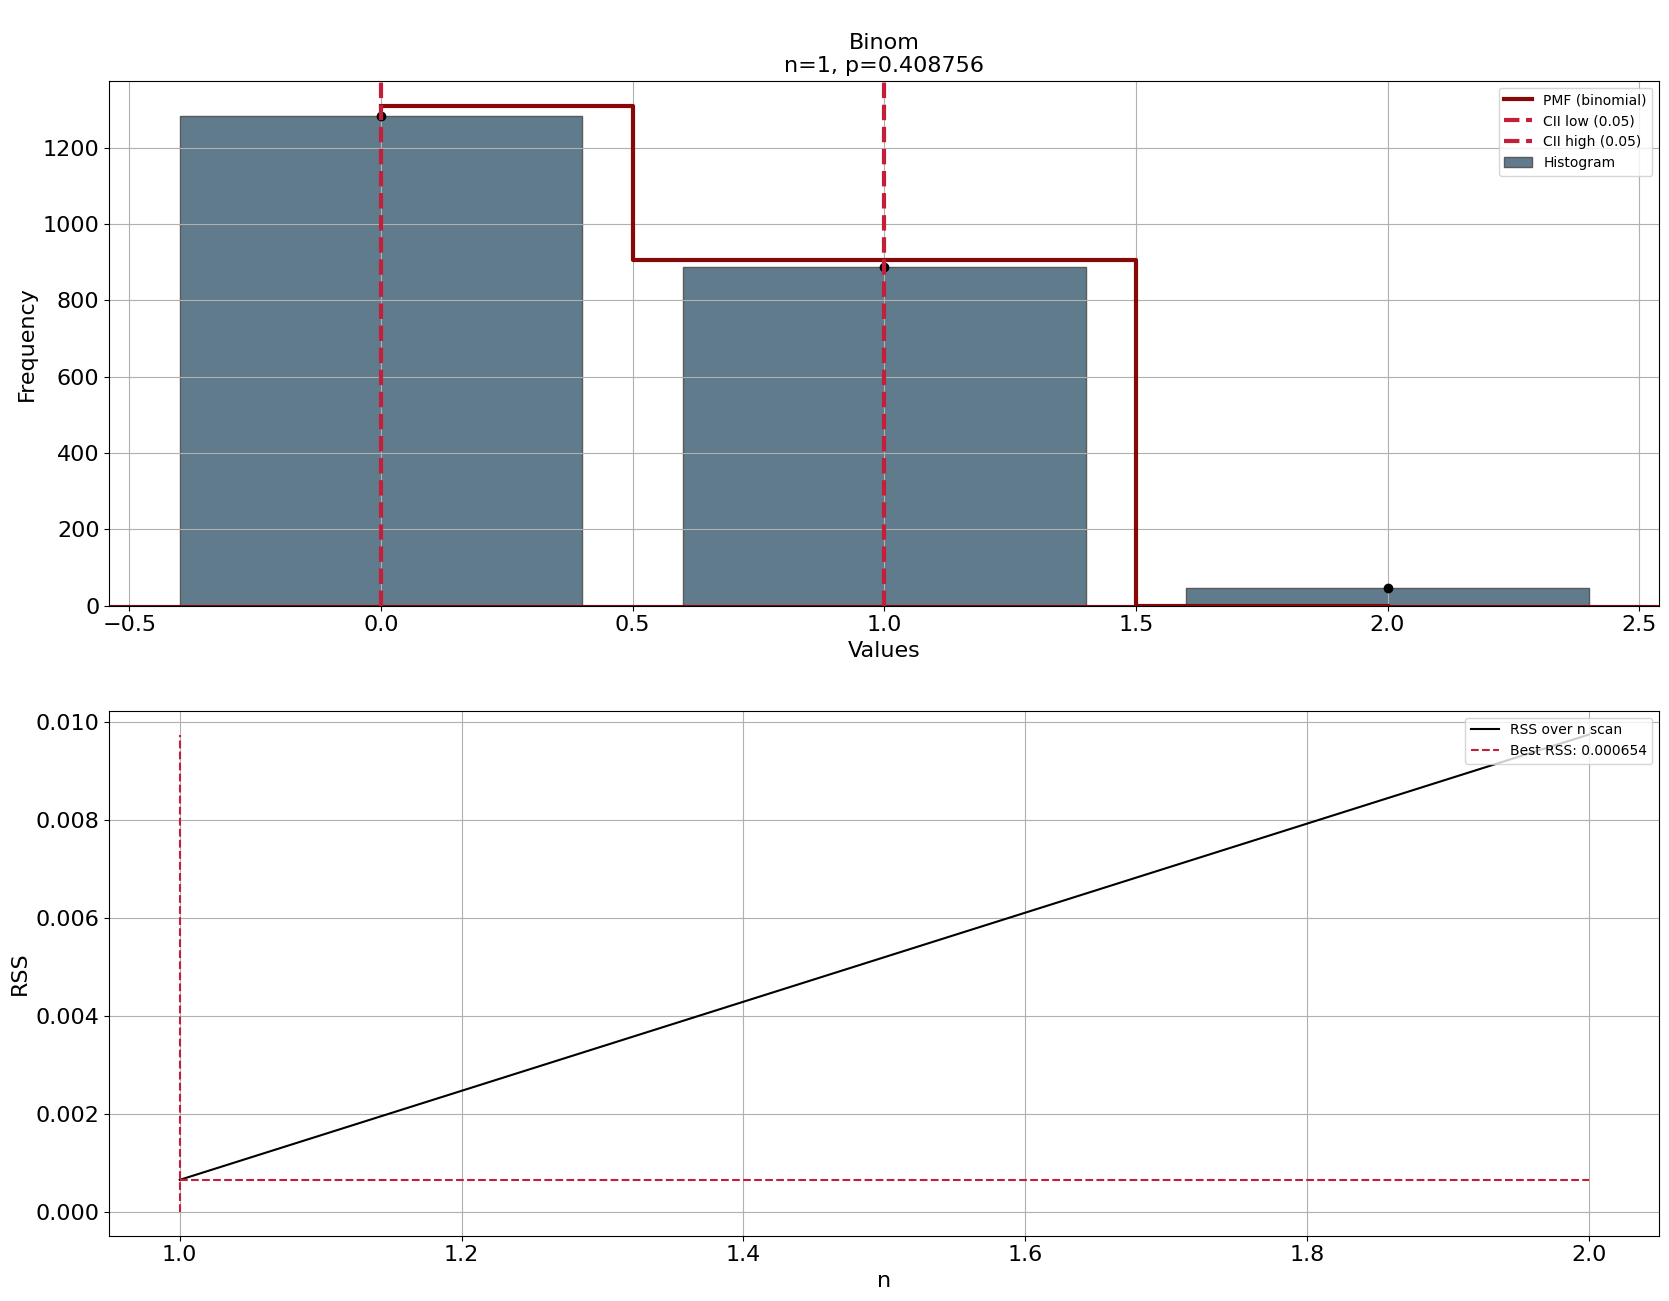

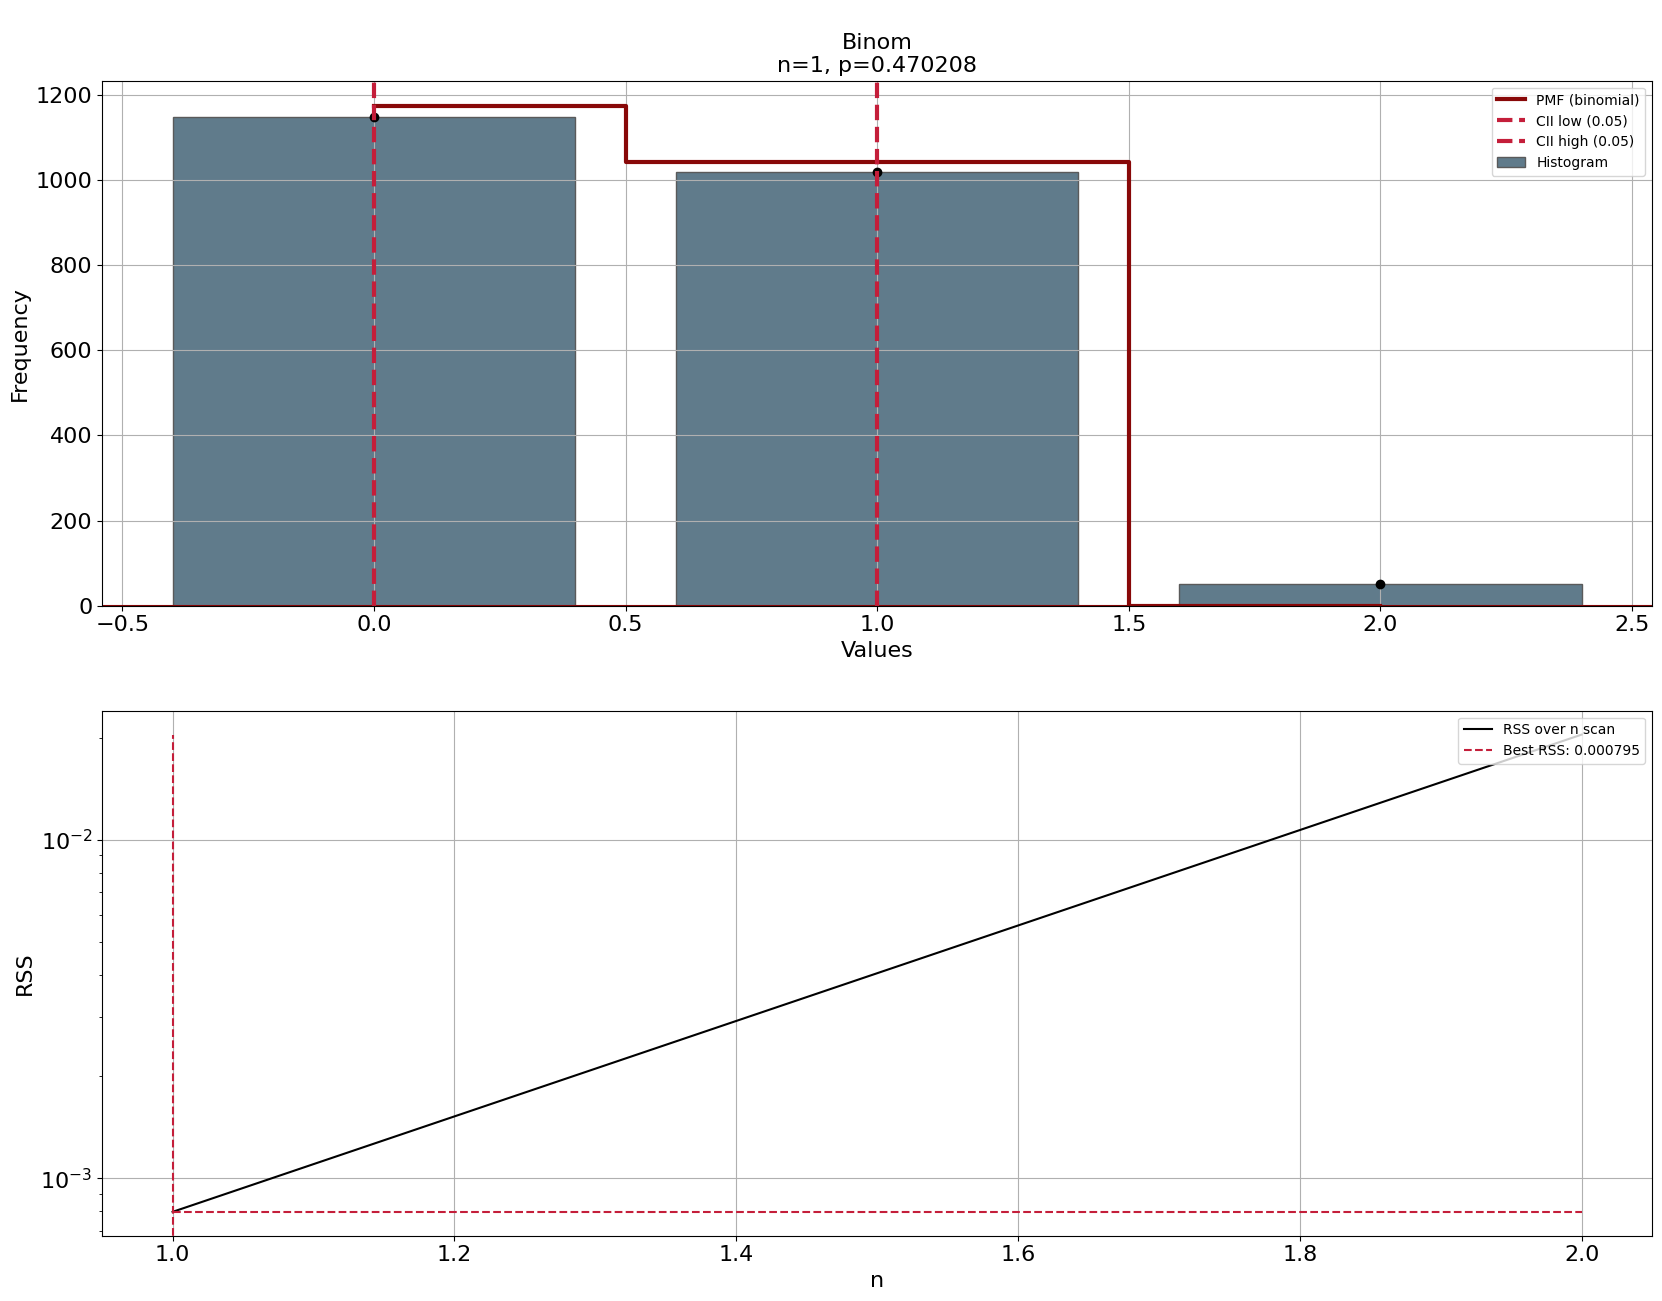

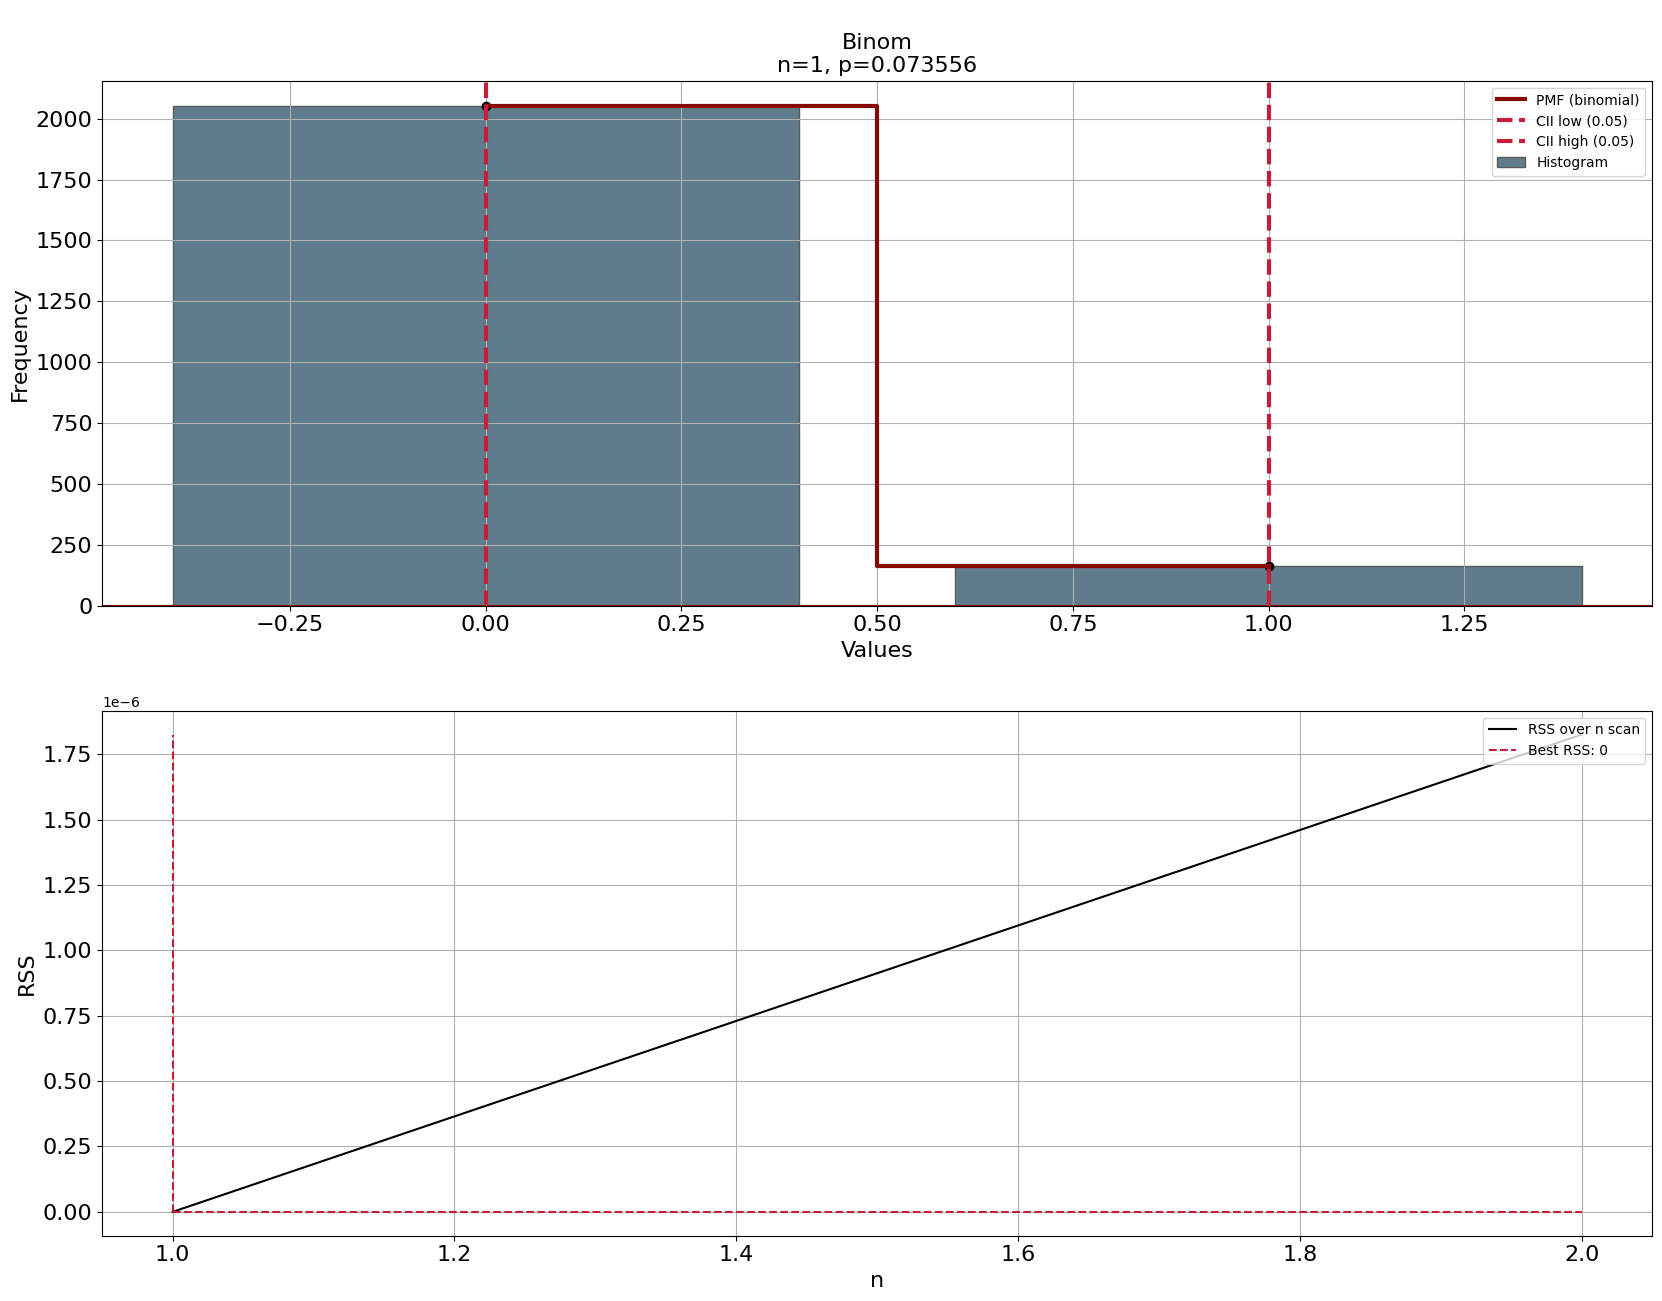

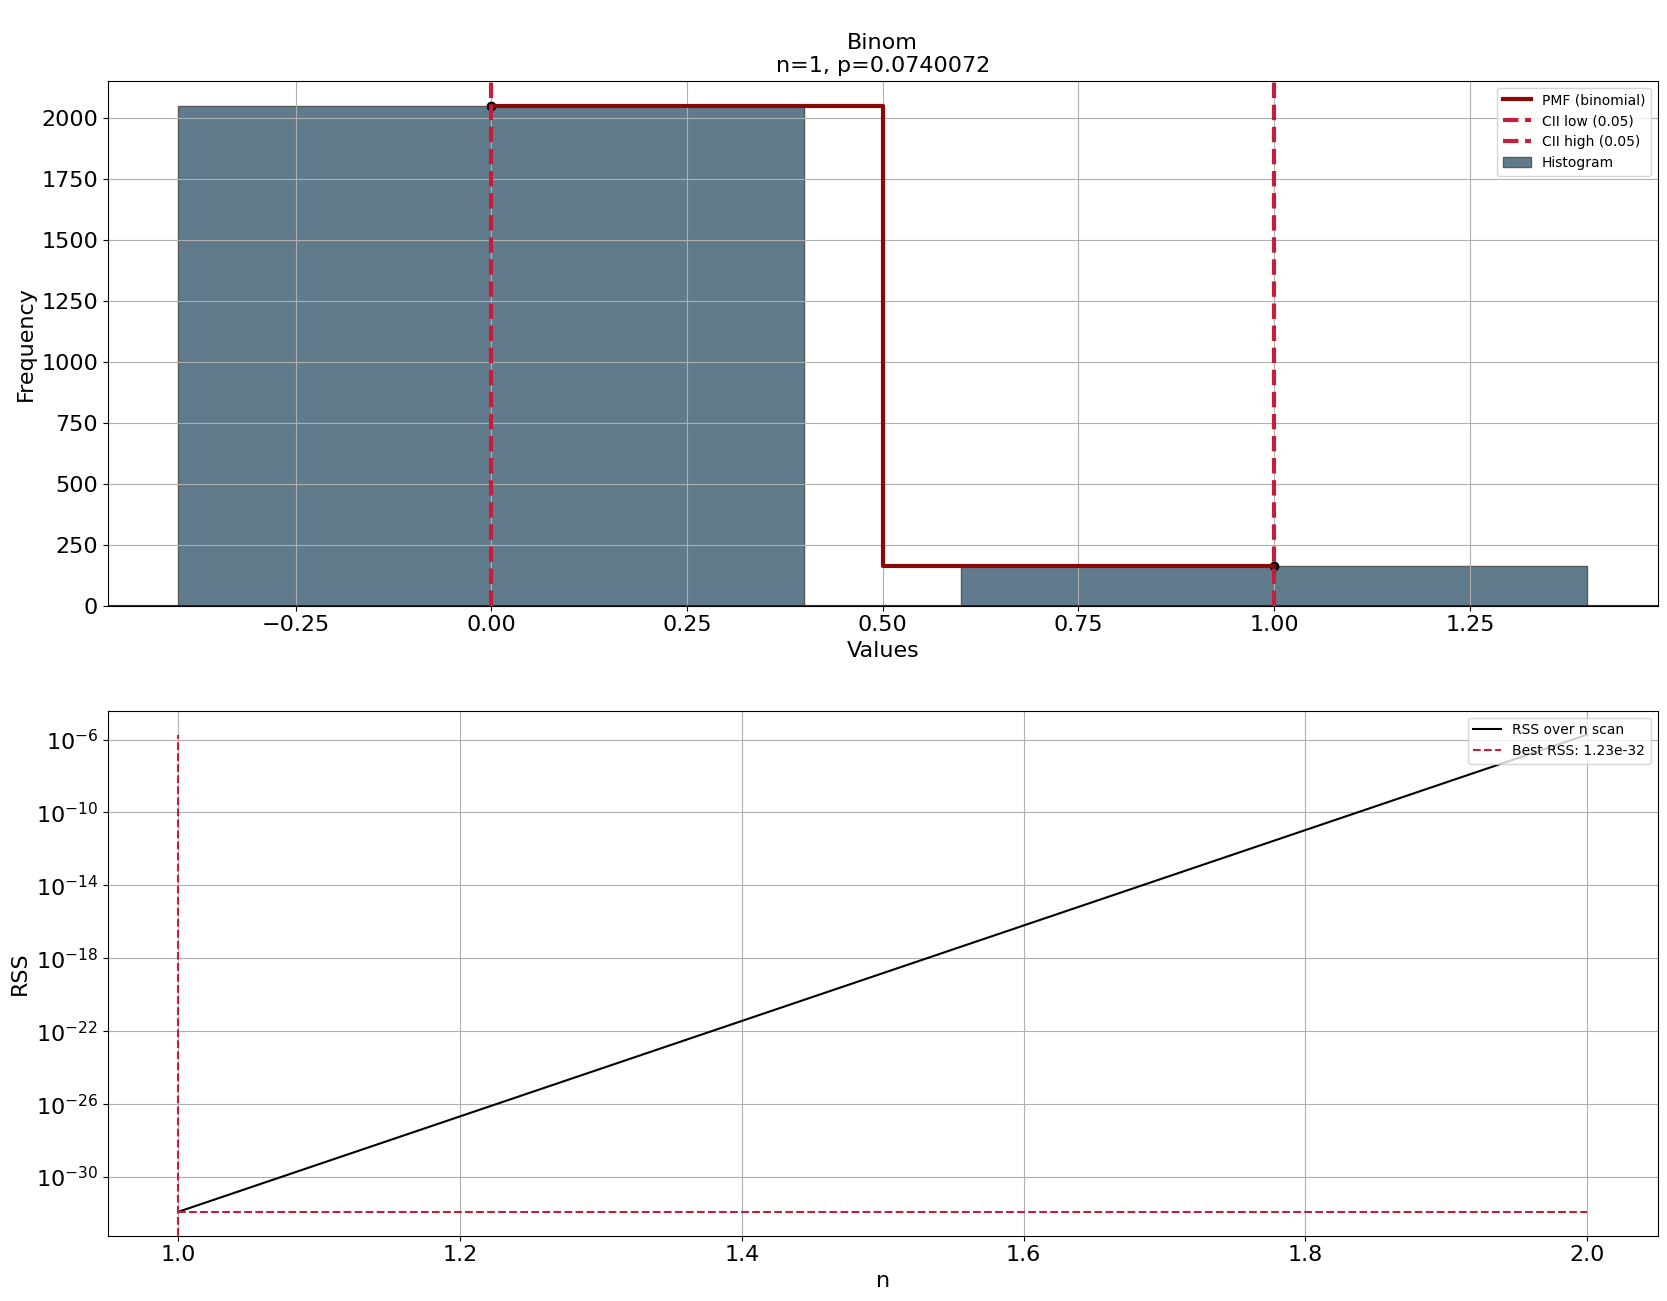

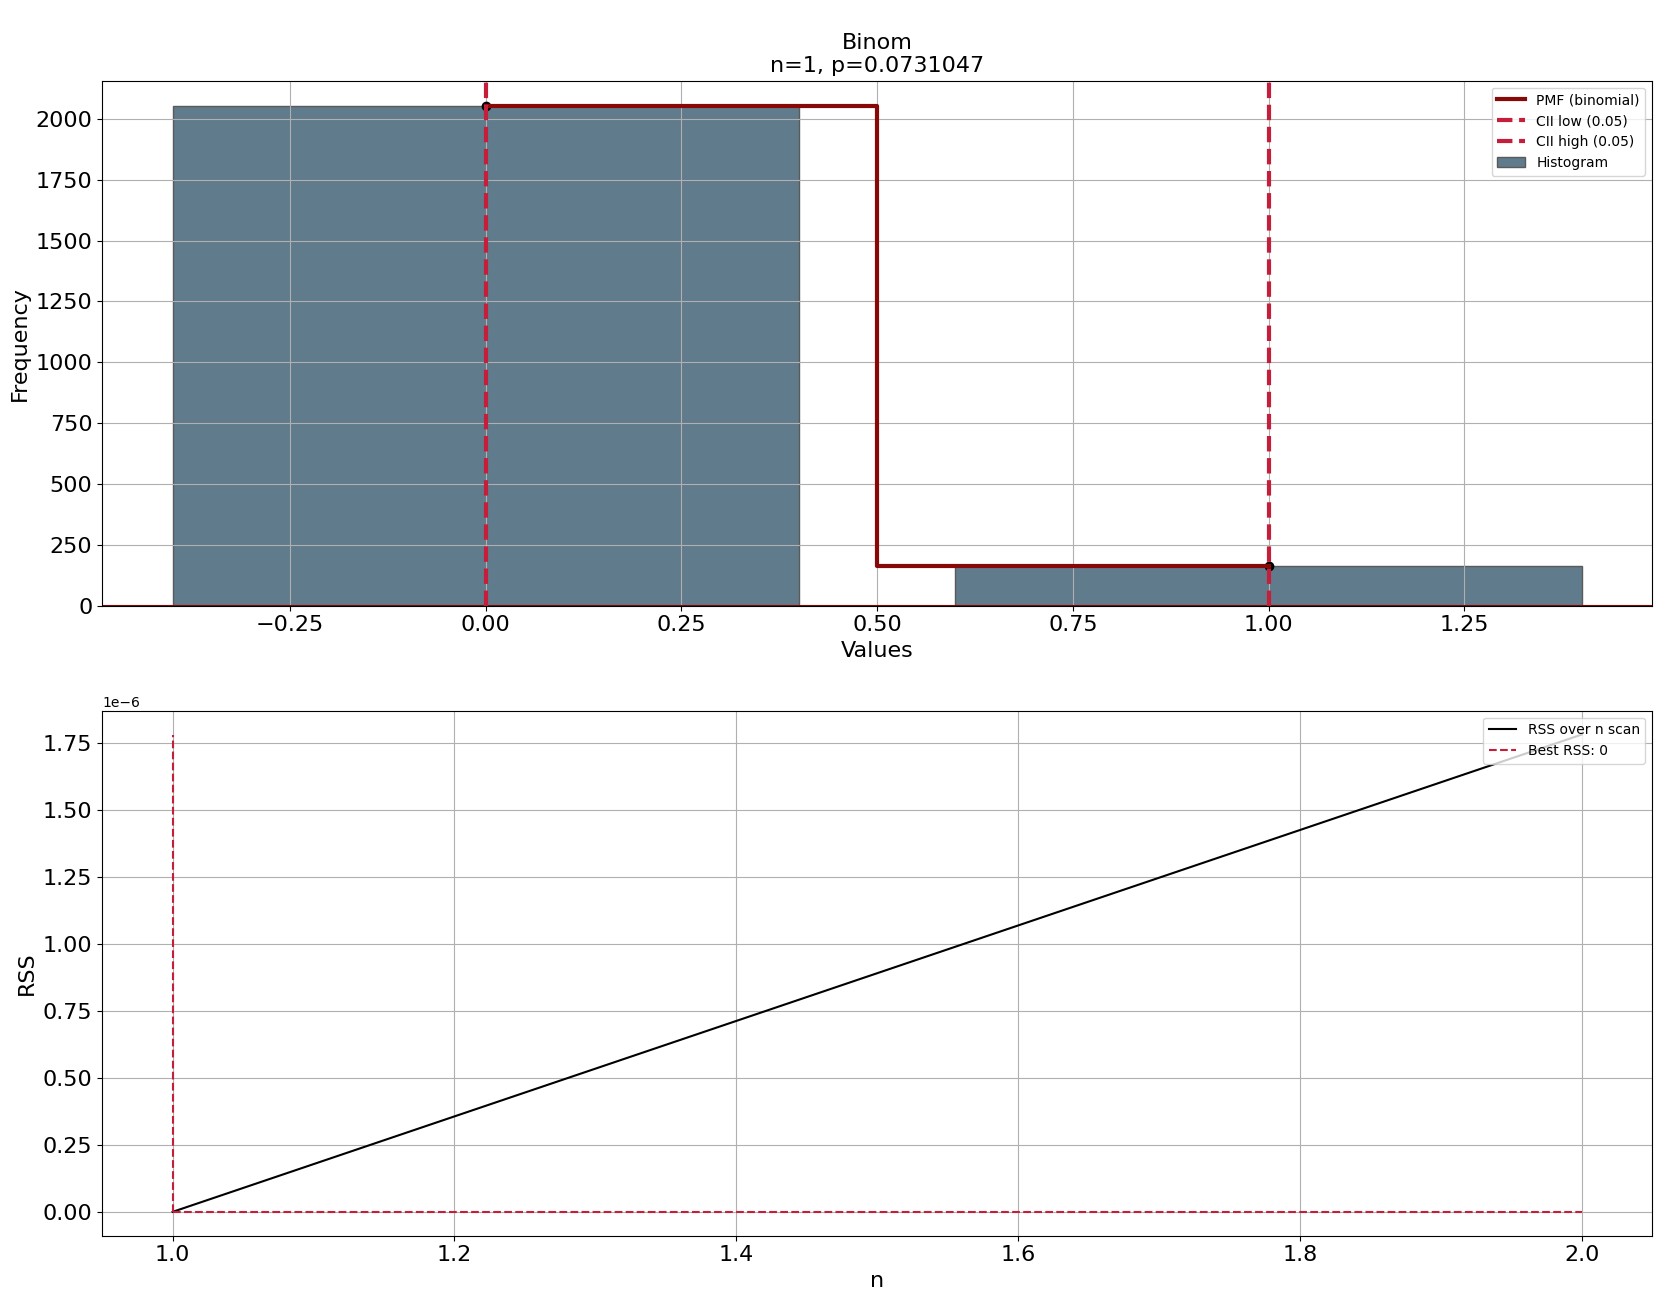

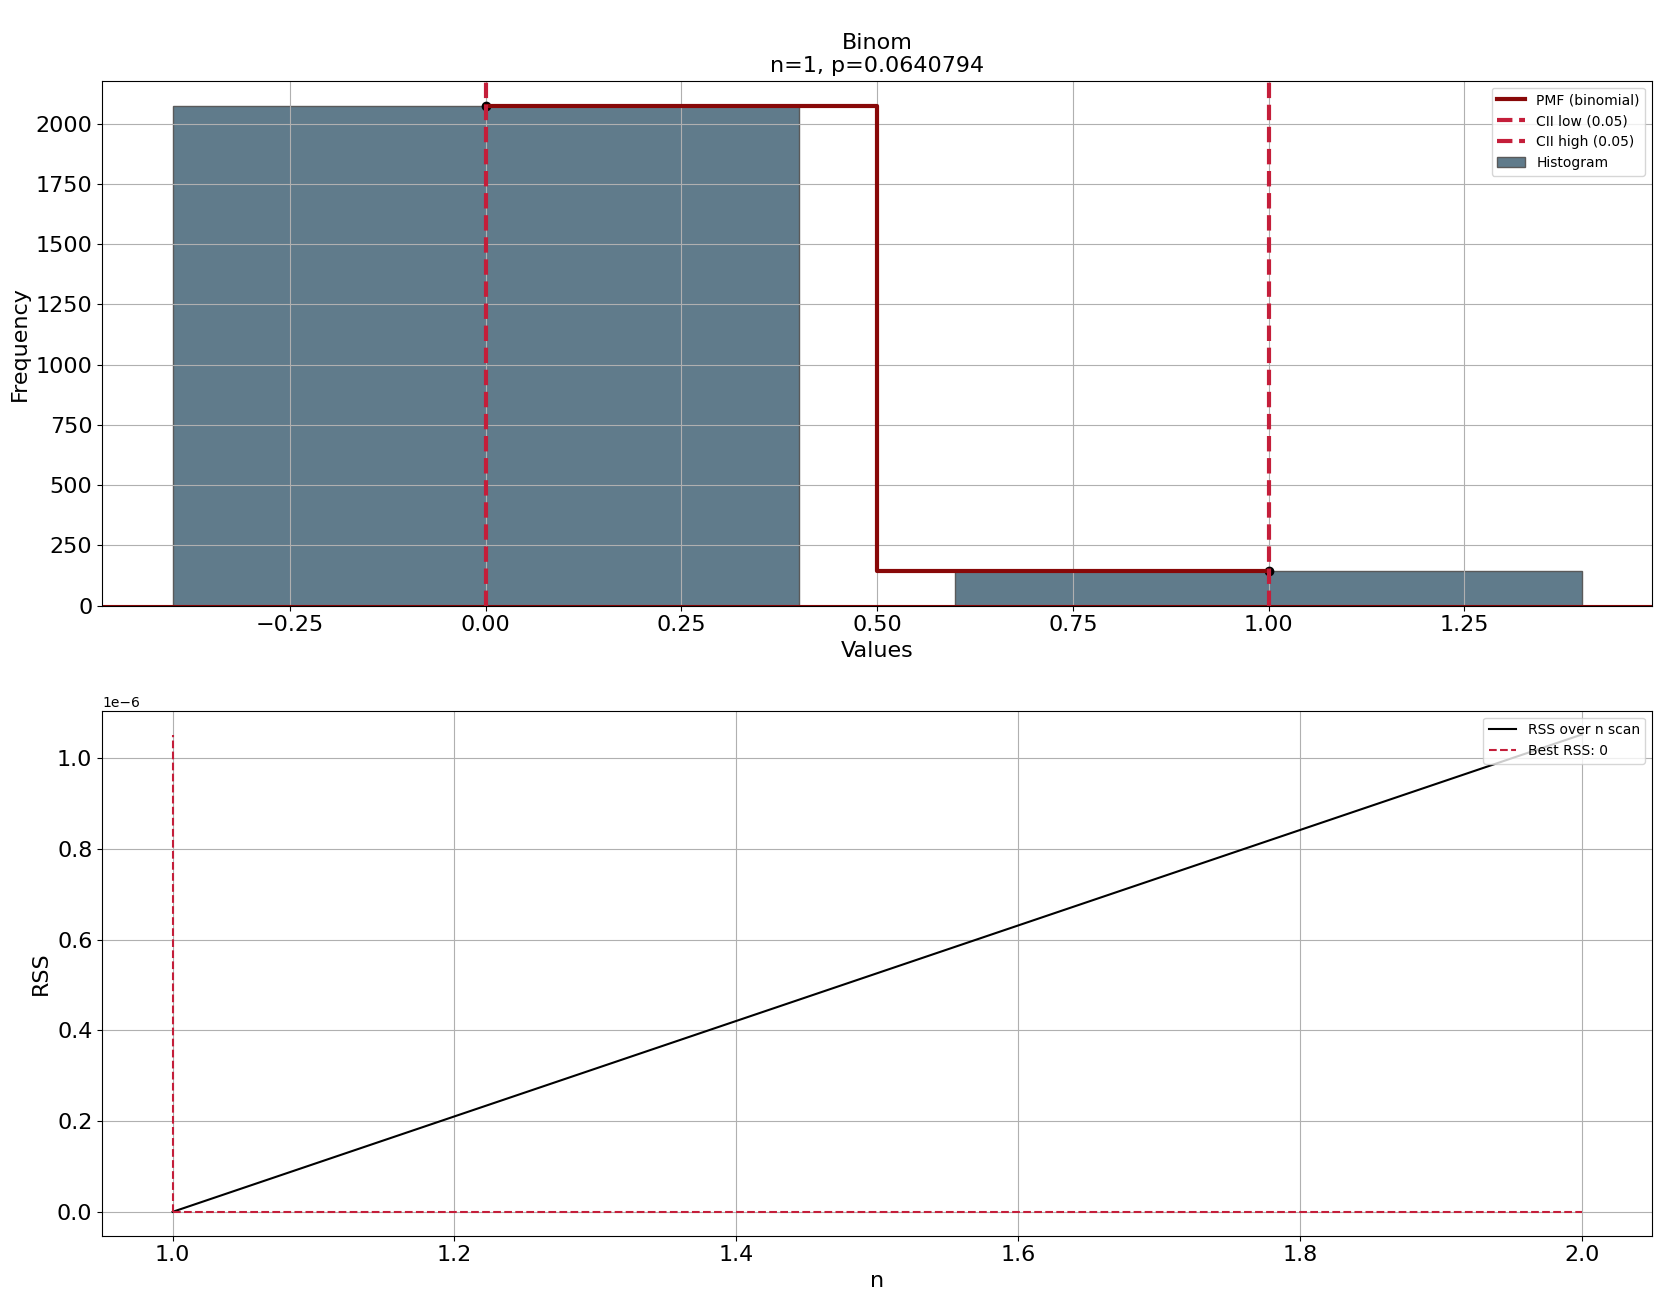

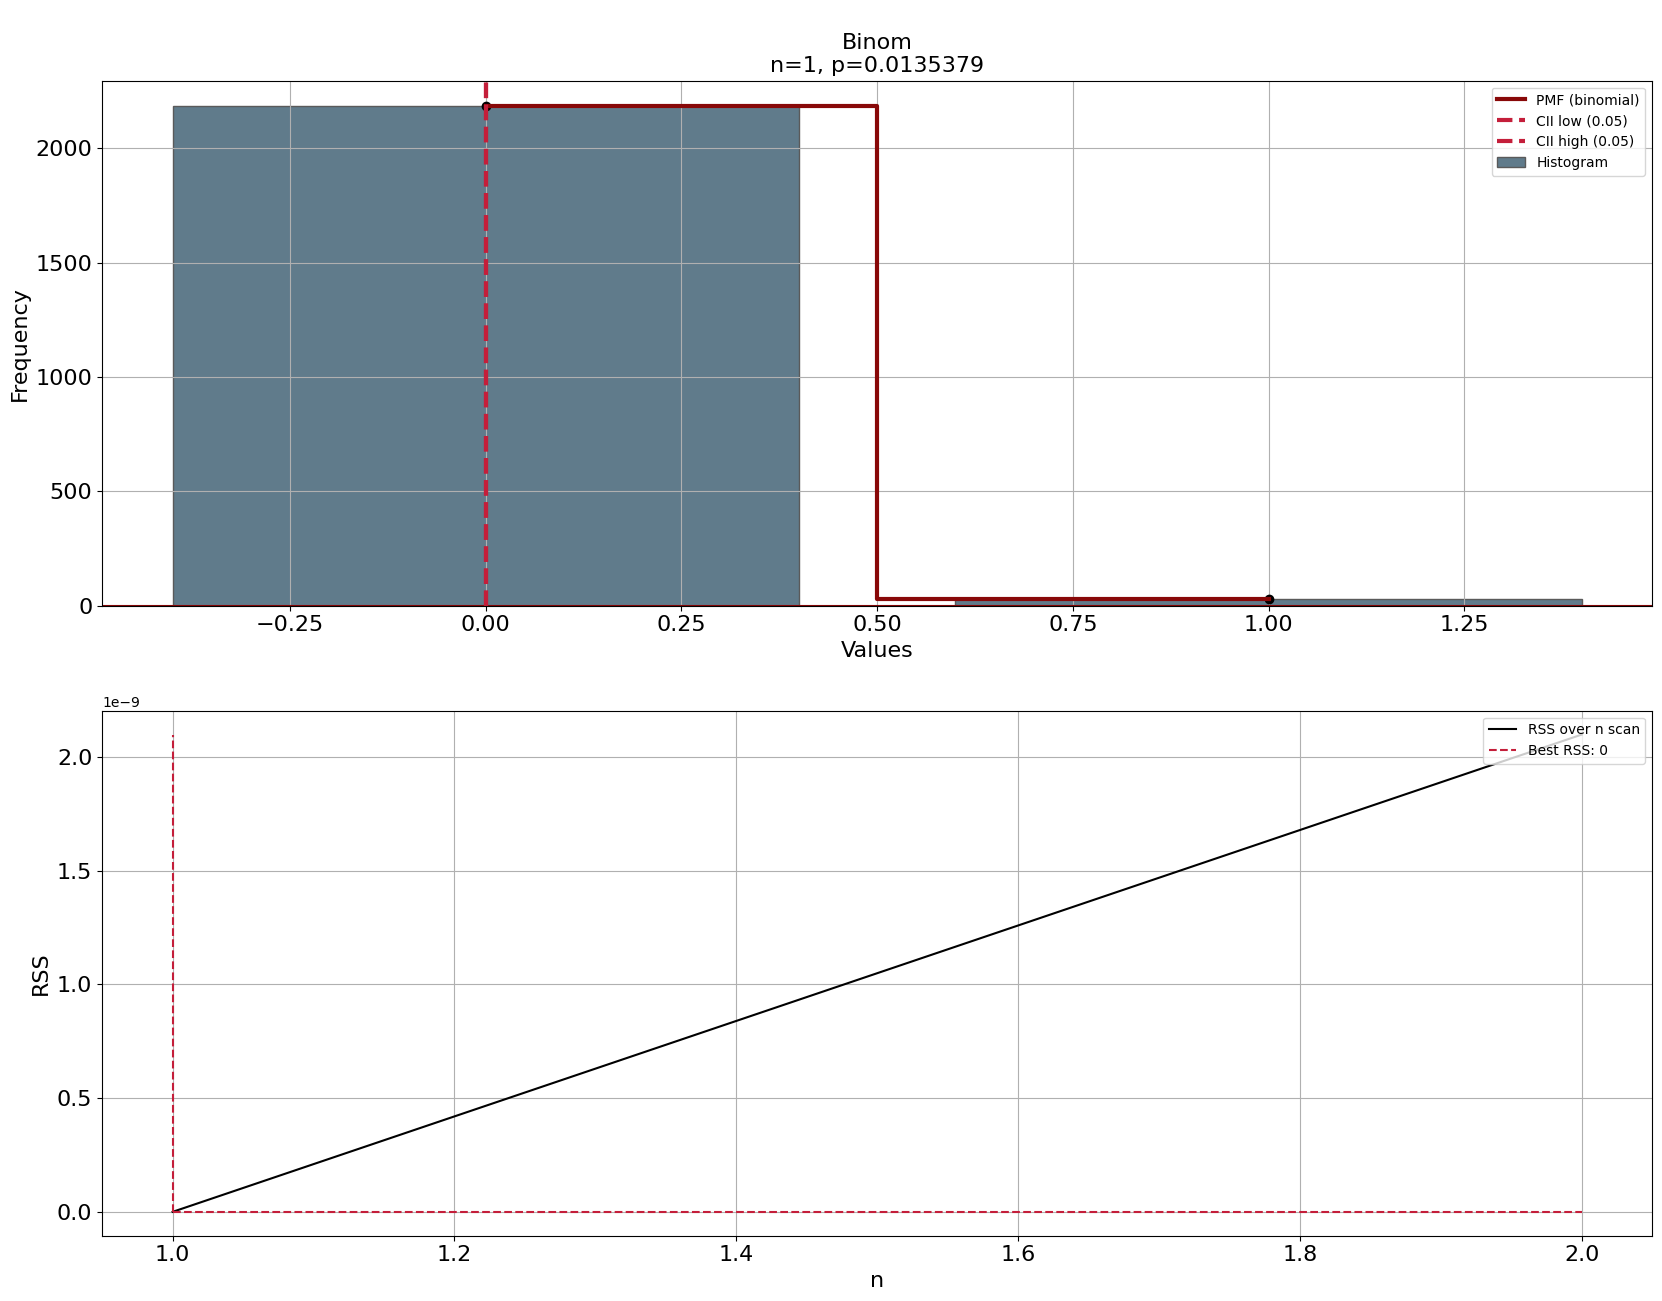

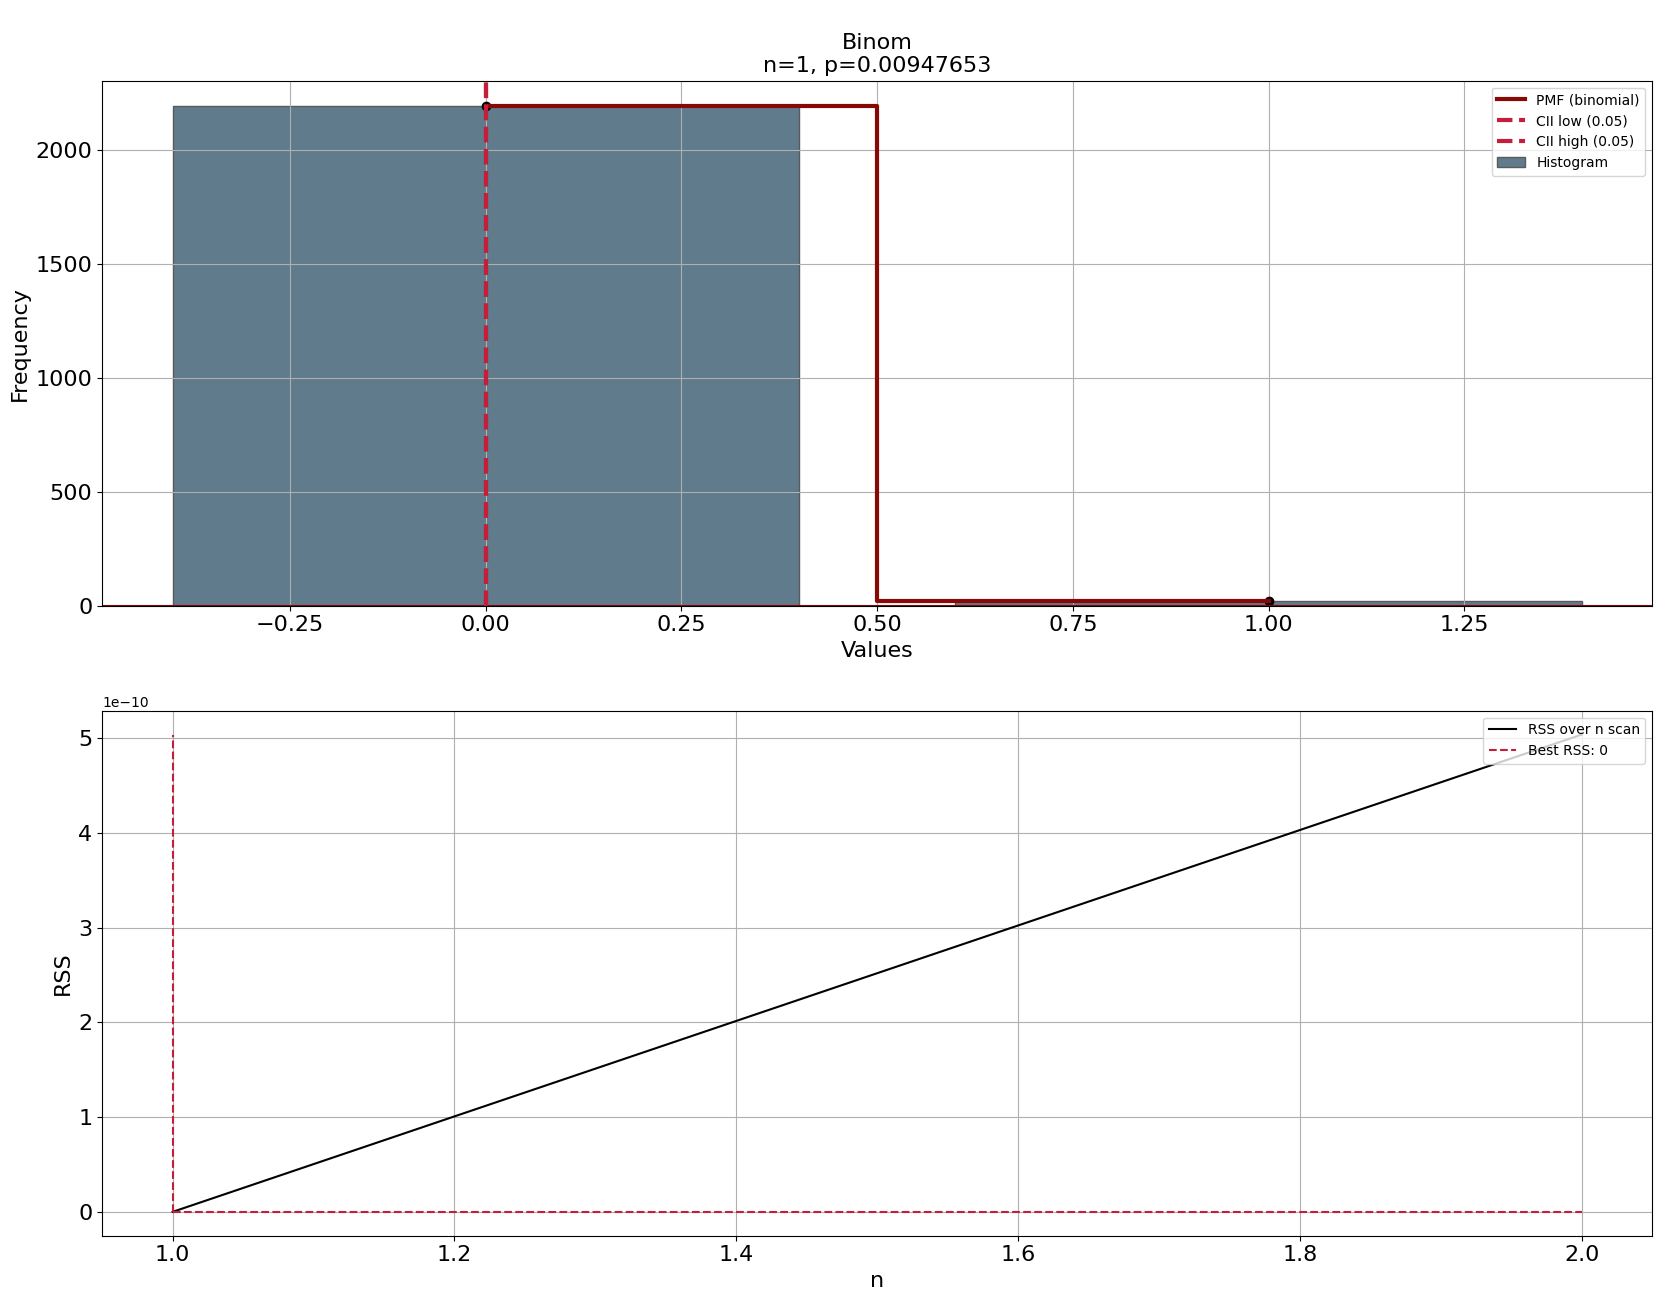

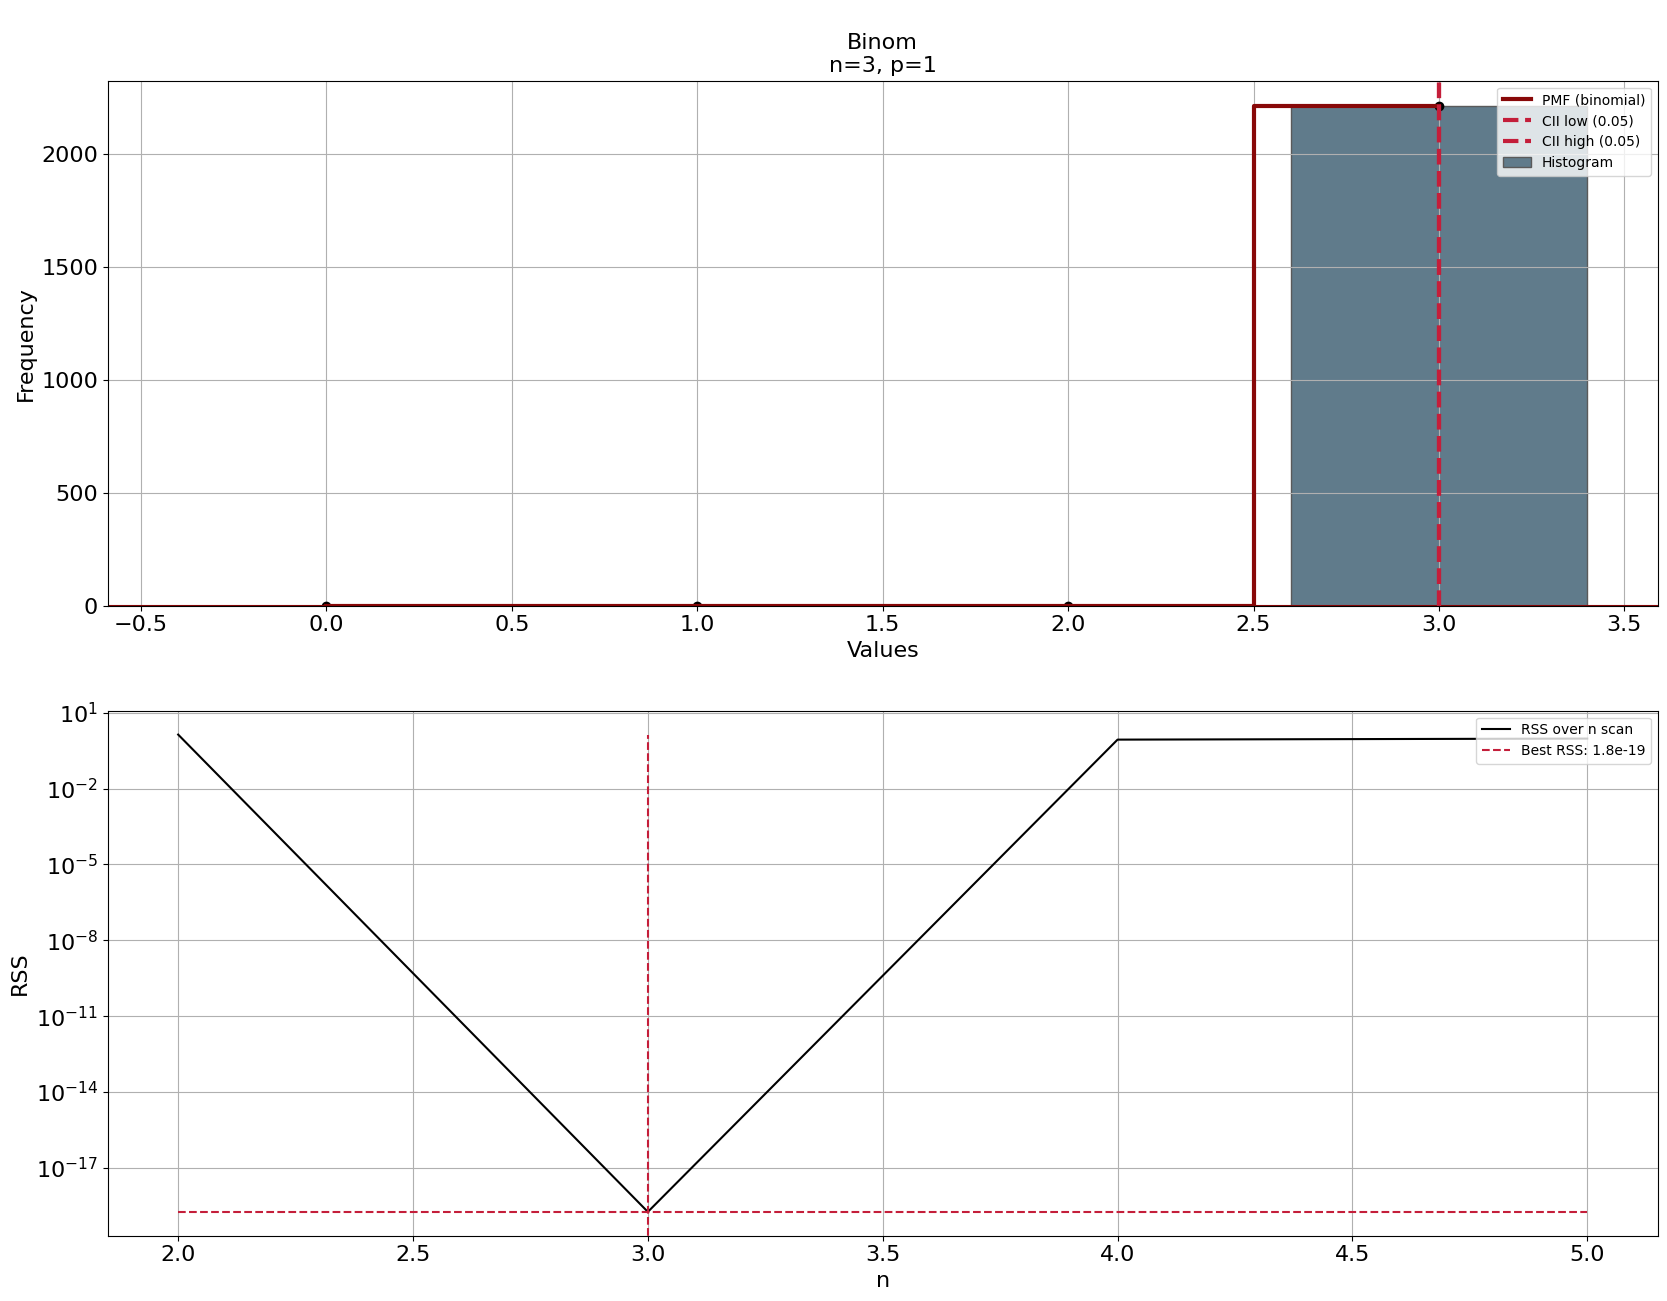

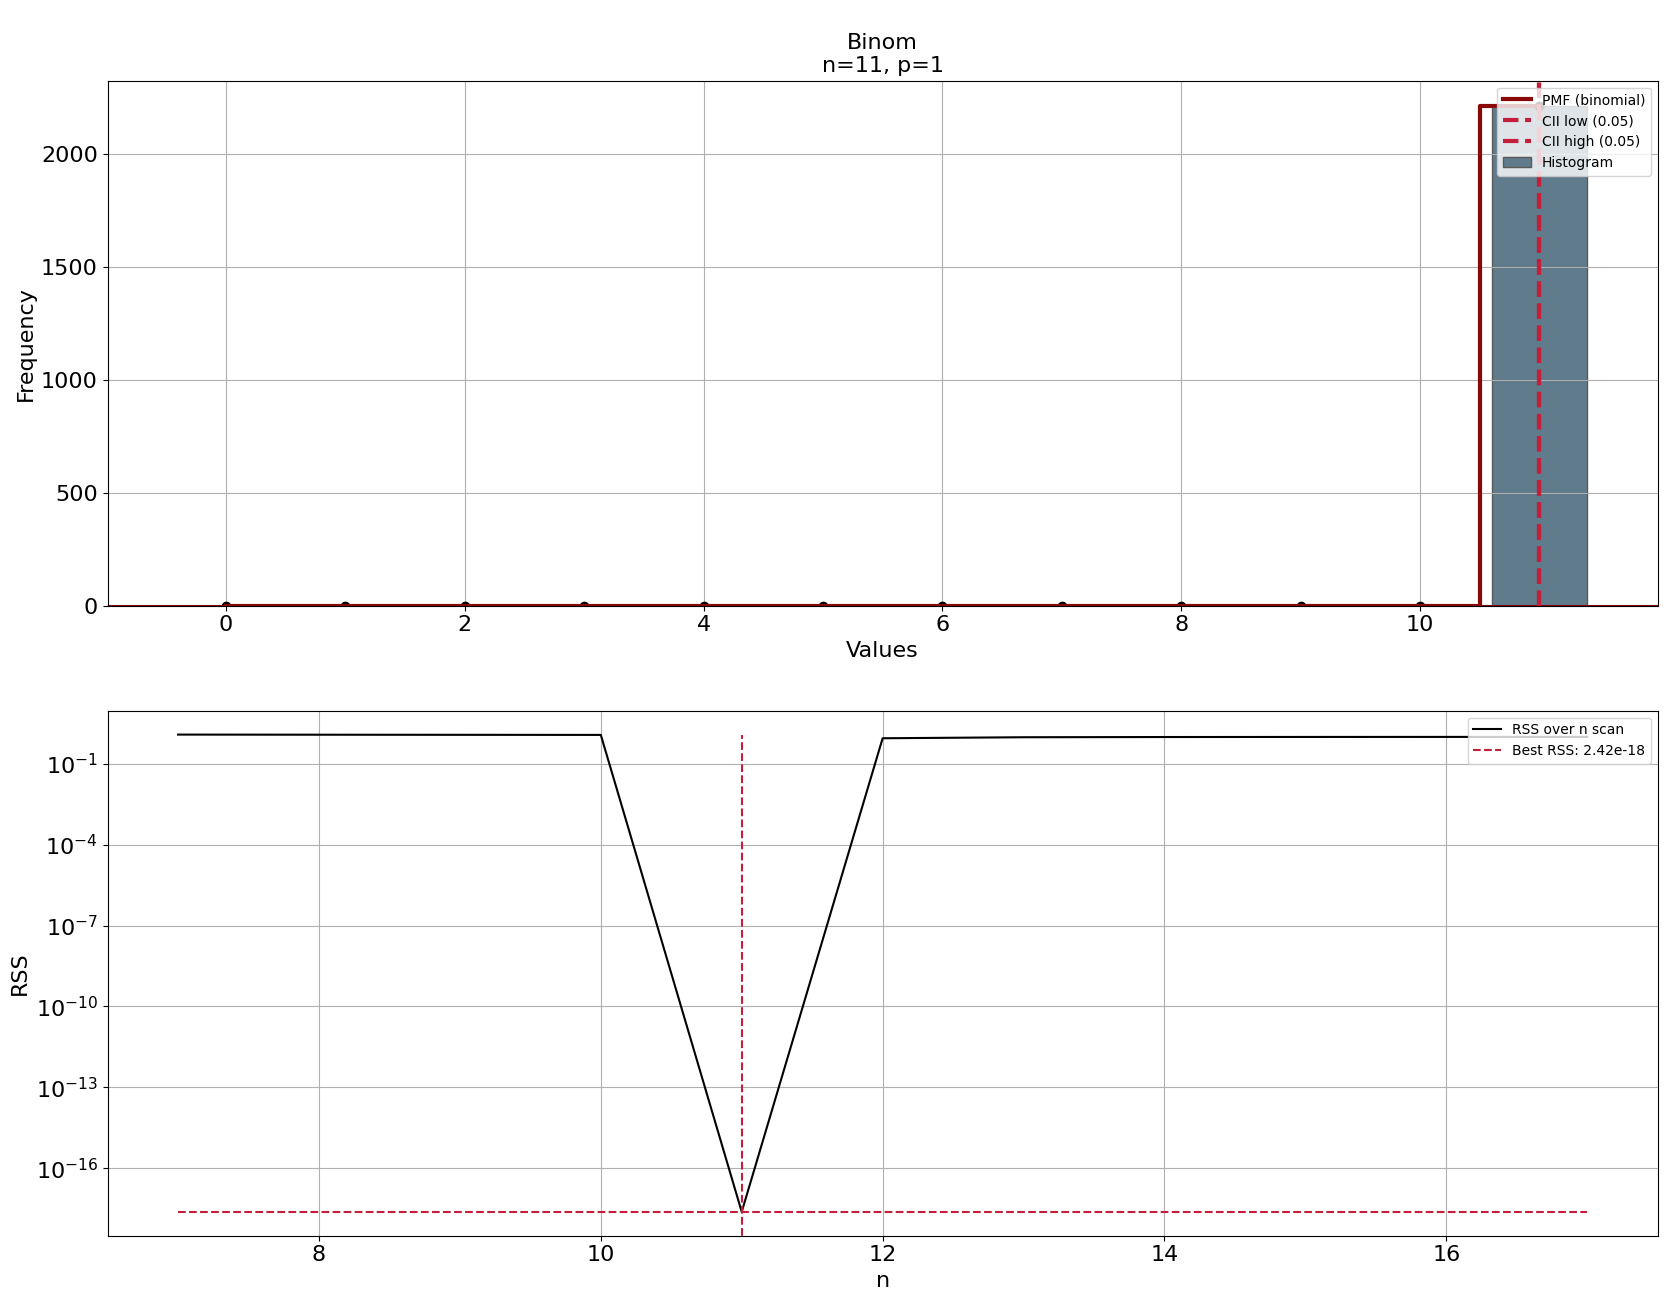

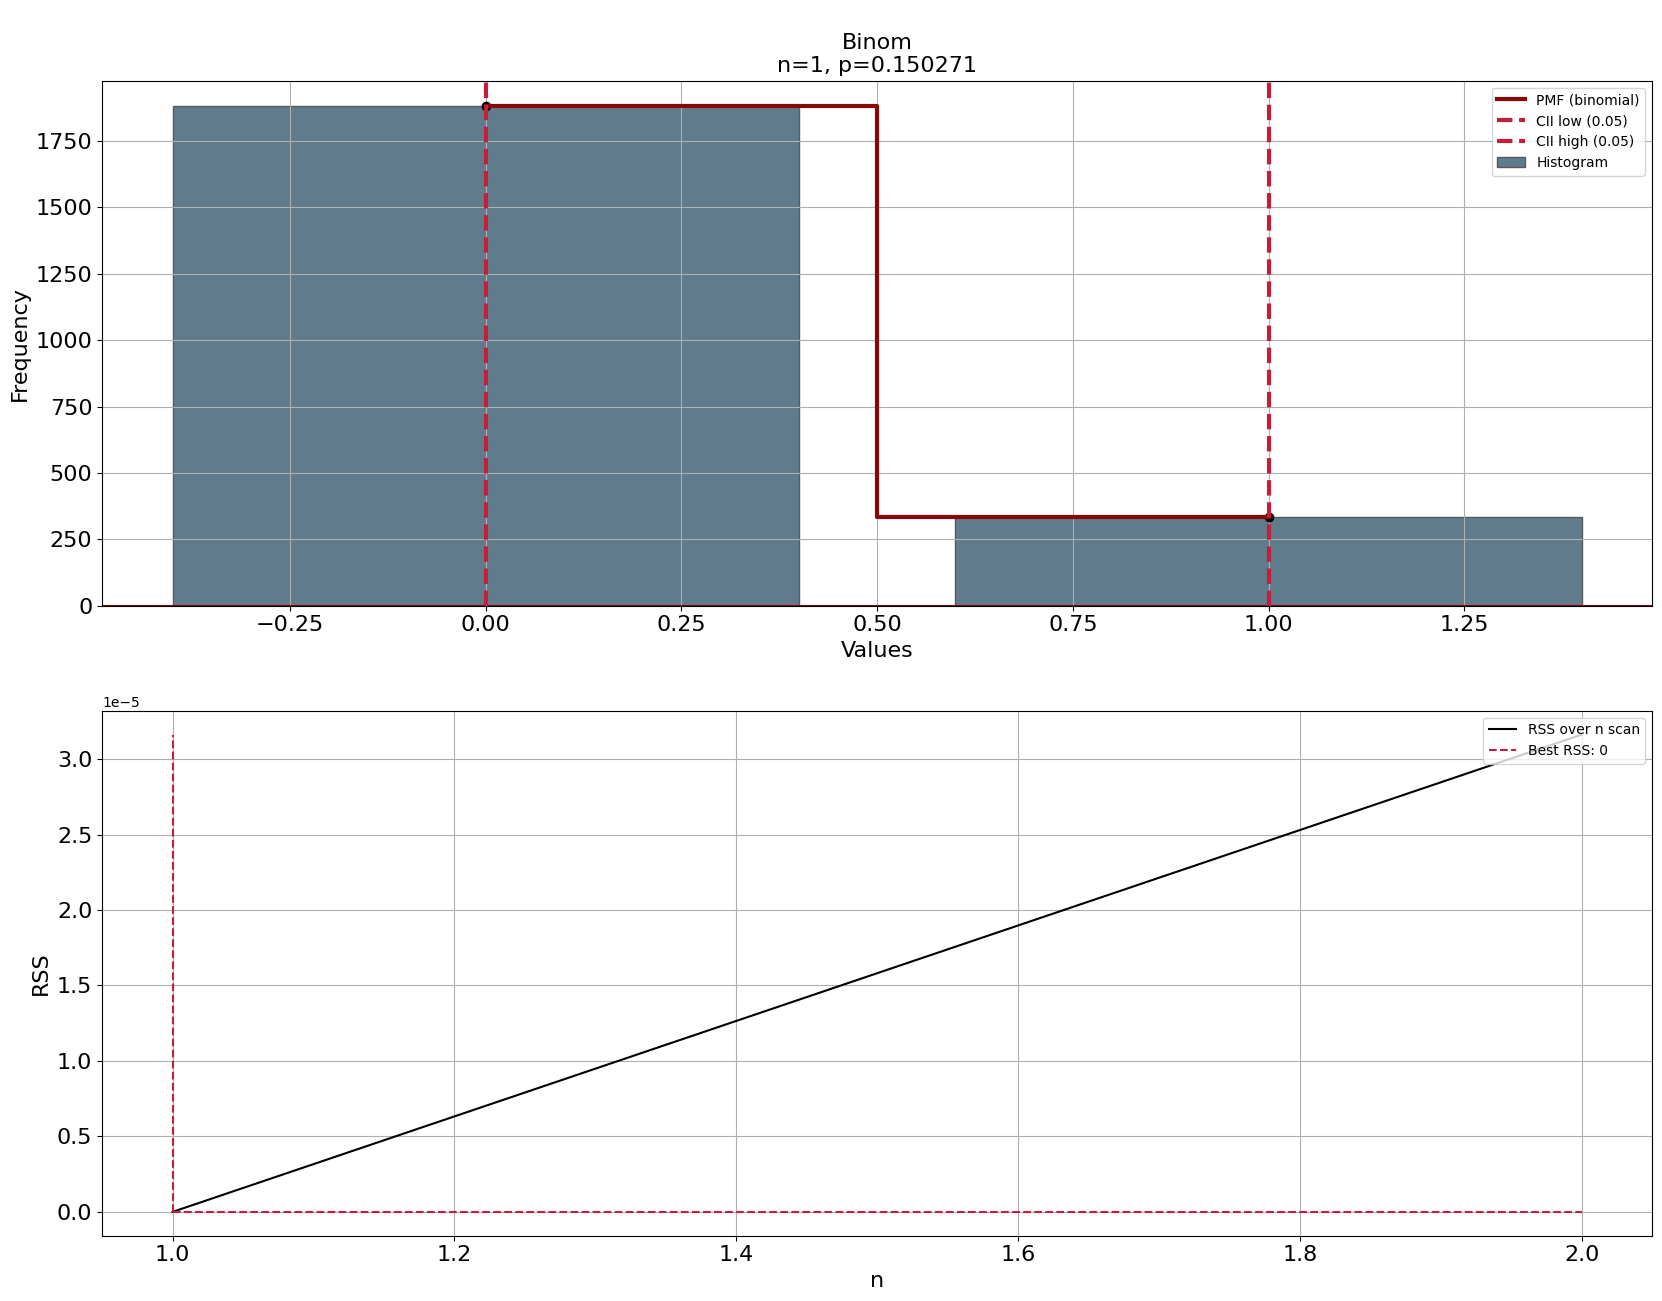

In [160]:
# Import library
from distfit import distfit

# Initialize 
dfit = distfit(method='discrete',distr='multinomial')  

for col in cat_columns:
    
    results = dfit.fit_transform(null_out_data[col])   # Fit distributions on empirical data X
    dfit.plot()             # Plot the best fitted distribution (y is included if prediction is made)
    results['model']
    
    
